In [1]:
!pip install --quiet virtualenv
!virtualenv autotmenv
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local python=3.9 ujson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 10.6 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 2127ms
  creator CPython3Posix(dest=/content/autotmenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.3.1, setuptools==69.0.2, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
--2023-12-19 09:08:10--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141672045 (135M) [te

In [2]:
import sys
import os
sys.path.append('/usr/local/lib/python3.9/site-packages/')
os.environ['CONDA_PREFIX'] = '/usr/local/envs/autotmenv'

In [3]:
! pip install --quiet autotm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 17.2 MB/s eta 

In [4]:
import time
import logging
import os
import uuid
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from autotm.base import AutoTM
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import KMeans
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.9/site-packages/artm/master_component.py:654: DeprecationWarning: invalid escape sequence '\*'
  """
/usr/local/lib/python3.9/site-packages/artm/master_component.py:760: DeprecationWarning: invalid escape sequence '\d'
  """
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [8]:
df = pd.read_csv('./ready_data.csv', sep=';')

In [9]:
working_dir_path = 'autotm_artifacts'

In [10]:
! mkdir $working_dir_path

In [11]:
df

,url,title,timestamp,tag,article_text
0,https://quote.rbc.ru/news/article/658076219a79...,Путин продлил срок замещения еврооблигаций рос...,2023-12-18 18:12:16,Евробонды,Компании обязаны заместить свои облигации в ин...
1,https://quote.rbc.ru/news/article/655763ec9a79...,Акции АЛРОСА слабо отреагировали на санкции ЕС...,2023-12-18 15:45:04,АЛРОСА,ЕС включил в новый пакет антироссийских санкци...
2,https://quote.rbc.ru/news/article/65804e8e9a79...,Цены на газ в Европе выросли на 10% на новостя...,2023-12-18 14:11:12,Brent,Биржевые цены на газ в Европе растут на фоне с...
3,https://quote.rbc.ru/news/article/658047e09a79...,"ЦБ установил курсы доллара, евро и юаня на 19 ...",2023-12-18 13:49:52,ЦБ,Центральный банк России установил официальный ...
4,https://quote.rbc.ru/news/article/658029209a79...,Совет директоров «Мать и дитя» утвердил дивиде...,2023-12-18 12:07:28,«Мать и Дитя»,"На новости о дивполитике, а также обновленной ..."
...,...,...,...,...,...
4995,https://quote.rbc.ru/news/article/635ae4489a79...,Акции Amazon обрушились на 21% на отчете и пот...,2022-10-27 21:07:12,Apple,Квартальные отчетности и прогнозы Apple и Amaz...
4996,https://quote.rbc.ru/news/article/635aa40a9a79...,Акции банка «Санкт-Петербург» взлетели на 9% п...,2022-10-27 16:12:48,Банки и финансы,Обыкновенные акции банка «Санкт-Петербург» выр...
4997,https://quote.rbc.ru/news/article/627e10719a79...,"Фондовая биржа: что это, как работает и как на...",2022-10-27 15:13:04,Мосбиржа,"Что из себя представляет фондовая биржа, каким..."
4998,https://quote.rbc.ru/news/article/635a8e169a79...,ЕЦБ повысил ставку до максимального уровня за ...,2022-10-27 14:04:48,ЕЦБ,Европейский регулятор поднял ключевую ставку н...


In [24]:
autotm = AutoTM(
      topic_count=20,
      texts_column_name='article_text',
      preprocessing_params={
          "lang": "ru",
      },
      alg_params={
          "num_iterations": 5,
      },
      working_dir_path=working_dir_path
  )


In [25]:
mixtures = autotm.fit_predict(df.iloc[:500])

Saved to autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501/prep_df.csv
Starting...
part 1/1
autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501/cooc_df.txt is ready!
autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501/cooc_tf.txt is ready!
Calculating pPMI...
Calculating pPMI...
autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501/ppmi_tf.txt is ready!
autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501/ppmi_df.txt is ready!


2023-12-19 09:26:14,499 - GA_algo - INFO - Starting experiment: 1702977974
2023-12-19 09:26:14,502 - GA_algo - INFO - ALGORITHM PARAMS  number of individuals 11; number of fitness evals unlimited; number of early stopping iterations 500; crossover prob None
2023-12-19 09:26:14,508 - root - INFO - Calculating fitness...
2023-12-19 09:26:14,510 - root - INFO - Doing fitness calculating with individual {"id": "3ae4d526-1e8e-4178-915e-8484c76c4ab2", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [0.0, 18.0, 28.479780881352447, 5.034225737341891, 0.0, -416.152403497338, -929.3032793406788, 0.0, 773.696598611597, -100.21350806502153, 0.0, 0.0, 0.28724639900675775, 0.5398170752791501, 0.07047084994570707, 0.0], "exp_id": 0, "alg_id": "ga", "iteration_id": 0, "tag": "v0", "fitness_value": null, "fitness_name": "default", "dataset": "__noname__", "topic_count": 20, "train_option": "offline", "force_dataset_settings_checkout": false}
2023-12-19 09:26:14,513 - roo

Training is complete


2023-12-19 09:26:17,843 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 492.68it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.4417517461030571 0.20114094800820484


20it [00:00, 8668.60it/s]
0it [00:00, ?it/s]
20it [00:00, 4828.81it/s]
0it [00:00, ?it/s]
20it [00:00, 3158.72it/s]
0it [00:00, ?it/s]
20it [00:00, 1126.26it/s]
0it [00:00, ?it/s]
20it [00:00, 969.57it/s]
0it [00:00, ?it/s]
20it [00:00, 1013.25it/s]
0it [00:00, ?it/s]
20it [00:00, 810.04it/s]
0it [00:00, ?it/s]
20it [00:00, 674.85it/s]
0it [00:00, ?it/s]
20it [00:00, 507.70it/s]
0it [00:00, ?it/s]
20it [00:00, 433.79it/s]
0it [00:00, ?it/s]
2023-12-19 09:26:18,555 - root - INFO - Fitness estimation took  4.04
2023-12-19 09:26:18,900 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:26:18,976 - root - INFO - Doing fitness calculating with individual {"id": "3d6fe22c-91ee-472f-85ef-fb84f2761f71", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [25115.106433559387, 16.0, 10.189594421189662, 81.44554736824588, 5.0, -548.1771090657164, -963.7067170539552, 2.0, -657.8864167990411, -862.3845767423936, 8.0, 2.0, 0.5937690221909057, 0.4175547062483904, 0.21

Training is complete


2023-12-19 09:26:24,321 - root - INFO - Building dictionary
0it [00:00, ?it/s]
20it [00:00, 202135.13it/s]
2it [00:00, 537.15it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.0 0


0it [00:00, ?it/s]
20it [00:00, 204600.20it/s]
0it [00:00, ?it/s]
20it [00:00, 225500.22it/s]
0it [00:00, ?it/s]
20it [00:00, 62045.92it/s]
0it [00:00, ?it/s]
20it [00:00, 220173.44it/s]
0it [00:00, ?it/s]
20it [00:00, 223696.21it/s]
0it [00:00, ?it/s]
20it [00:00, 157680.60it/s]
0it [00:00, ?it/s]
20it [00:00, 207638.81it/s]
0it [00:00, ?it/s]
20it [00:00, 221920.85it/s]
0it [00:00, ?it/s]
20it [00:00, 219597.07it/s]
0it [00:00, ?it/s]
20it [00:00, 213450.59it/s]
2023-12-19 09:26:24,696 - root - INFO - Fitness estimation took  5.72
2023-12-19 09:26:24,995 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:26:25,037 - root - INFO - Doing fitness calculating with individual {"id": "6d1acd86-52b7-420d-bc8c-109019746497", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [94547.97270155583, 0.0, 13.257932540871353, 53.71919828181556, 22.0, -501.5587254879759, -212.51959037213135, 5.0, -338.9607800936441, -285.96407346328783, 18.0, 0.0, 0.4561746144288956

Training is complete


2023-12-19 09:26:36,842 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 751.75it/s]
0it [00:00, ?it/s]
4it [00:00, 730.17it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6007492317617676 0.4156078912525274


20it [00:00, 7078.99it/s]
0it [00:00, ?it/s]
20it [00:00, 6131.13it/s]
0it [00:00, ?it/s]
20it [00:00, 3519.60it/s]
0it [00:00, ?it/s]
20it [00:00, 2815.44it/s]
0it [00:00, ?it/s]
20it [00:00, 1505.20it/s]
0it [00:00, ?it/s]
20it [00:00, 1214.67it/s]
0it [00:00, ?it/s]
20it [00:00, 1367.07it/s]
0it [00:00, ?it/s]
20it [00:00, 744.90it/s]
0it [00:00, ?it/s]
20it [00:00, 795.13it/s]
0it [00:00, ?it/s]
20it [00:00, 614.82it/s]
0it [00:00, ?it/s]
2023-12-19 09:26:38,023 - root - INFO - Fitness estimation took  12.19
2023-12-19 09:26:38,766 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:26:38,806 - root - INFO - Doing fitness calculating with individual {"id": "a75267fe-8c46-485d-8cf3-b7b94ac4ee4a", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [15922.33394201198, 23.0, 70.37554883098134, 9.476342311924512, 26.0, -660.3622745474751, -448.03606649907147, 2.0, 87.28950148023705, 500.5960242268975, 6.0, 0.0, 0.5239784388588118, 0.48289280593359163, 0.

Training is complete


2023-12-19 09:26:43,398 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 726.17it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5912940402371396 0.22781553389218678


20it [00:00, 9293.83it/s]
0it [00:00, ?it/s]
20it [00:00, 3540.84it/s]
0it [00:00, ?it/s]
20it [00:00, 2962.81it/s]
0it [00:00, ?it/s]
20it [00:00, 818.93it/s]
0it [00:00, ?it/s]
20it [00:00, 1245.56it/s]
0it [00:00, ?it/s]
20it [00:00, 1509.18it/s]
0it [00:00, ?it/s]
20it [00:00, 1261.31it/s]
0it [00:00, ?it/s]
20it [00:00, 920.74it/s]
0it [00:00, ?it/s]
20it [00:00, 513.04it/s]
0it [00:00, ?it/s]
20it [00:00, 399.56it/s]
0it [00:00, ?it/s]
2023-12-19 09:26:44,071 - root - INFO - Fitness estimation took  5.26
2023-12-19 09:26:44,519 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:26:44,583 - root - INFO - Doing fitness calculating with individual {"id": "707bdda3-6c39-4d75-b83e-5092b246ab12", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [38314.54891130799, 5.0, 19.865005976488426, 10.982491561421382, 8.0, -63.03179428946976, 983.8670042680499, 0.0, 117.85773236764771, 357.3753665350173, 24.0, 2.0, 0.9899363975083936, 0.08340240787513353, 0.85

Training is complete


2023-12-19 09:26:56,351 - root - INFO - Building dictionary
0it [00:00, ?it/s]
20it [00:00, 212369.82it/s]
2it [00:00, 296.76it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.0 0


0it [00:00, ?it/s]
20it [00:00, 192841.56it/s]
0it [00:00, ?it/s]
20it [00:00, 48970.27it/s]
0it [00:00, ?it/s]
20it [00:00, 226719.14it/s]
0it [00:00, ?it/s]
20it [00:00, 207638.81it/s]
0it [00:00, ?it/s]
20it [00:00, 221335.30it/s]
0it [00:00, ?it/s]
20it [00:00, 238312.73it/s]
0it [00:00, ?it/s]
20it [00:00, 229824.88it/s]
0it [00:00, ?it/s]
20it [00:00, 237637.62it/s]
0it [00:00, ?it/s]
20it [00:00, 225500.22it/s]
0it [00:00, ?it/s]
20it [00:00, 223696.21it/s]
2023-12-19 09:26:56,678 - root - INFO - Fitness estimation took  5.83
2023-12-19 09:26:56,966 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:26:57,006 - root - INFO - Doing fitness calculating with individual {"id": "1511a44b-8887-4443-b5cc-79fe8951c0ba", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [99386.86872187459, 0.0, 53.634779578732704, 46.64025635835457, 18.0, 940.152484255764, -891.3867491603287, 21.0, 552.3186850124189, -278.1172077089318, 6.0, 3.0, 0.7001260306932217, 0.3

Early stopping is triggered


2023-12-19 09:27:00,008 - root - INFO - Building dictionary
6it [00:00, 2275.60it/s]
14it [00:00, 154121.41it/s]
3it [00:00, 259.71it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.0005150460703806129 0.0


6it [00:00, 7521.17it/s]
14it [00:00, 151731.93it/s]
6it [00:00, 14794.72it/s]
14it [00:00, 168252.88it/s]
6it [00:00, 11351.30it/s]
14it [00:00, 173728.57it/s]
6it [00:00, 16246.50it/s]
14it [00:00, 151340.87it/s]
6it [00:00, 14438.22it/s]
14it [00:00, 189420.18it/s]
6it [00:00, 15887.52it/s]
14it [00:00, 179025.17it/s]
6it [00:00, 16018.98it/s]
14it [00:00, 173216.09it/s]
6it [00:00, 16777.22it/s]
14it [00:00, 97541.95it/s]
6it [00:00, 17685.05it/s]
14it [00:00, 198379.24it/s]
6it [00:00, 16256.99it/s]
14it [00:00, 150179.68it/s]
2023-12-19 09:27:00,197 - root - INFO - Fitness estimation took  3.19
2023-12-19 09:27:00,432 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:27:00,491 - root - INFO - Doing fitness calculating with individual {"id": "48954bc8-6aa7-40ef-bc00-0d74f64710ef", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [87865.30703140119, 4.0, 97.93233934395792, 7.748676820219924, 8.0, -718.3144387042657, 321.1826254602711, 21.0, -965

Early stopping is triggered


1it [00:00, 334.23it/s]
19it [00:00, 179485.98it/s]
1it [00:00, 416.23it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.0 0


1it [00:00, 1432.48it/s]
19it [00:00, 153253.42it/s]
1it [00:00, 3518.71it/s]
19it [00:00, 133041.36it/s]
1it [00:00, 1903.04it/s]
19it [00:00, 199229.44it/s]
1it [00:00, 696.50it/s]
19it [00:00, 200230.59it/s]
1it [00:00, 1214.33it/s]
19it [00:00, 21313.66it/s]
1it [00:00, 540.57it/s]
19it [00:00, 200734.95it/s]
1it [00:00, 512.00it/s]
19it [00:00, 199728.76it/s]
1it [00:00, 345.78it/s]
19it [00:00, 191566.77it/s]
1it [00:00, 565.27it/s]
19it [00:00, 202778.06it/s]
1it [00:00, 479.90it/s]
19it [00:00, 228999.36it/s]
2023-12-19 09:27:05,423 - root - INFO - Fitness estimation took  4.93
2023-12-19 09:27:05,662 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:27:05,700 - root - INFO - Doing fitness calculating with individual {"id": "6932d04c-0a19-42fb-a5b0-72d1368d889f", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [12399.960277637323, 17.0, 79.35544895413649, 71.12129896799874, 7.0, 389.57421914968427, -865.4661182787178, 21.0, -581.26480219649

Training is complete


2023-12-19 09:27:12,812 - root - INFO - Building dictionary
0it [00:00, ?it/s]
20it [00:00, 223101.28it/s]
1it [00:00, 256.25it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.0 0


0it [00:00, ?it/s]
20it [00:00, 204600.20it/s]
0it [00:00, ?it/s]
20it [00:00, 205603.14it/s]
0it [00:00, ?it/s]
20it [00:00, 249660.95it/s]
0it [00:00, ?it/s]
20it [00:00, 233016.89it/s]
0it [00:00, ?it/s]
20it [00:00, 219023.71it/s]
0it [00:00, ?it/s]
20it [00:00, 201649.23it/s]
0it [00:00, ?it/s]
20it [00:00, 234975.01it/s]
0it [00:00, ?it/s]
20it [00:00, 187664.61it/s]
0it [00:00, ?it/s]
20it [00:00, 228572.43it/s]
0it [00:00, ?it/s]
20it [00:00, 261327.35it/s]
2023-12-19 09:27:13,397 - root - INFO - Fitness estimation took  7.69
2023-12-19 09:27:13,813 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:27:13,877 - root - INFO - The fitness results have been obtained
2023-12-19 09:27:13,881 - GA_algo - INFO - POPULATION IS CREATED
2023-12-19 09:27:13,883 - GA_algo - INFO - ENTERING GENERATION 0
2023-12-19 09:27:13,884 - GA_algo - INFO - PAIRS ARE CREATED
2023-12-19 09:27:13,890 - GA_algo - INFO - CURRENT COUNTER: 29
2023-12-19 09:27:13,892 - root - INFO - Calculating fitness..

Training is complete
Wow! all topics


20it [00:00, 774.20it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.43970788795408283 0.20374191381957296


20it [00:00, 8044.31it/s]
0it [00:00, ?it/s]
20it [00:00, 5294.17it/s]
0it [00:00, ?it/s]
20it [00:00, 3608.31it/s]
0it [00:00, ?it/s]
20it [00:00, 3088.25it/s]
0it [00:00, ?it/s]
20it [00:00, 2107.11it/s]
0it [00:00, ?it/s]
20it [00:00, 1011.76it/s]
0it [00:00, ?it/s]
20it [00:00, 1356.98it/s]
0it [00:00, ?it/s]
20it [00:00, 708.72it/s]
0it [00:00, ?it/s]
20it [00:00, 722.35it/s]
0it [00:00, ?it/s]
20it [00:00, 516.32it/s]
0it [00:00, ?it/s]
2023-12-19 09:27:18,007 - root - INFO - Fitness estimation took  4.11
2023-12-19 09:27:18,239 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:27:18,276 - root - INFO - Doing fitness calculating with individual {"id": "6652ad22-e025-426e-b423-cdd8bab880b7", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 7.0, -394.0017585407771, -698.9509772041916, 27.0, -135.65968131292692, 1000.0, 29.0, 5.0, 0.9609792888292359, 0.13056841268079034, 0.9253274209331299, 100000.0], "exp_id": 0, "alg_id

Training is complete


2023-12-19 09:27:29,808 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 666.87it/s]
0it [00:00, ?it/s]
5it [00:00, 867.70it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6025157675650668 0.3614578698552936


20it [00:00, 15191.25it/s]
0it [00:00, ?it/s]
20it [00:00, 5187.12it/s]
0it [00:00, ?it/s]
20it [00:00, 4021.38it/s]
0it [00:00, ?it/s]
20it [00:00, 2608.48it/s]
0it [00:00, ?it/s]
20it [00:00, 1096.16it/s]
0it [00:00, ?it/s]
20it [00:00, 1339.78it/s]
0it [00:00, ?it/s]
20it [00:00, 772.34it/s]
0it [00:00, ?it/s]
20it [00:00, 762.67it/s]
0it [00:00, ?it/s]
20it [00:00, 784.31it/s]
0it [00:00, ?it/s]
20it [00:00, 573.59it/s]
0it [00:00, ?it/s]
2023-12-19 09:27:31,065 - root - INFO - Fitness estimation took  12.79
2023-12-19 09:27:31,844 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:27:31,884 - root - INFO - Doing fitness calculating with individual {"id": "d23061a4-03c7-4cdc-94e6-70a8ce6d70bf", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [0, 20.0, 55.51620485402375, 8.623318224038687, 30, -931.5903211392925, -291.17529685632485, 0, 278.02971387681225, 282.63842910549744, 0, 0, 0.5239784388588118, 0.48289280593359163, 0.07280390203909981, 0],

Training is complete


2023-12-19 09:27:35,370 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 736.86it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

COMPONENTS:  0.4413855243284502 0.20692958300201253



20it [00:00, 15092.85it/s]
0it [00:00, ?it/s]
20it [00:00, 5335.59it/s]
0it [00:00, ?it/s]
20it [00:00, 4089.61it/s]
0it [00:00, ?it/s]
20it [00:00, 1460.77it/s]
0it [00:00, ?it/s]
20it [00:00, 1948.71it/s]
0it [00:00, ?it/s]
20it [00:00, 1412.13it/s]
0it [00:00, ?it/s]
20it [00:00, 839.10it/s]
0it [00:00, ?it/s]
20it [00:00, 797.87it/s]
0it [00:00, ?it/s]
20it [00:00, 696.27it/s]
0it [00:00, ?it/s]
20it [00:00, 580.32it/s]
0it [00:00, ?it/s]
2023-12-19 09:27:35,922 - root - INFO - Fitness estimation took  4.04
2023-12-19 09:27:36,193 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:27:36,231 - root - INFO - Doing fitness calculating with individual {"id": "227011cf-9a62-46c1-a7a7-77f098b3bc68", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 8.0, 85.25433175239326, -648.5019341453228, 30, -96.00611585331706, 1000.0, 30, 5.0, 0.5937690221909057, 0.4175547062483904, 0.2105551880040223, 100000.0], "exp_id": 0, "alg_id": "ga

Training is complete


2023-12-19 09:27:48,376 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 733.64it/s]
0it [00:00, ?it/s]
5it [00:00, 829.64it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5979233674984947 0.3468772233573013


20it [00:00, 15027.96it/s]
0it [00:00, ?it/s]
20it [00:00, 4692.14it/s]
0it [00:00, ?it/s]
20it [00:00, 4129.27it/s]
0it [00:00, ?it/s]
20it [00:00, 2845.14it/s]
0it [00:00, ?it/s]
20it [00:00, 1106.15it/s]
0it [00:00, ?it/s]
20it [00:00, 933.30it/s]
0it [00:00, ?it/s]
20it [00:00, 741.17it/s]
0it [00:00, ?it/s]
20it [00:00, 901.94it/s]
0it [00:00, ?it/s]
20it [00:00, 670.39it/s]
0it [00:00, ?it/s]
20it [00:00, 657.92it/s]
0it [00:00, ?it/s]
2023-12-19 09:27:49,664 - root - INFO - Fitness estimation took  13.43
2023-12-19 09:27:50,451 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:27:50,493 - root - INFO - Doing fitness calculating with individual {"id": "daa4ba0a-da3c-4e3d-a84d-30f690e1892c", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 8.0, 83.28394445274805, -649.4824277883736, 30, -97.75393217180351, 1000.0, 30, 5.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0, "alg_id": "ga

Training is complete


2023-12-19 09:28:02,330 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 364.30it/s]
0it [00:00, ?it/s]
5it [00:00, 507.22it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5979233674984947 0.34687722335730137


20it [00:00, 10240.00it/s]
0it [00:00, ?it/s]
20it [00:00, 5311.26it/s]
0it [00:00, ?it/s]
20it [00:00, 3201.39it/s]
0it [00:00, ?it/s]
20it [00:00, 951.16it/s]
0it [00:00, ?it/s]
20it [00:00, 1352.28it/s]
0it [00:00, ?it/s]
20it [00:00, 831.06it/s]
0it [00:00, ?it/s]
20it [00:00, 631.93it/s]
0it [00:00, ?it/s]
20it [00:00, 529.75it/s]
0it [00:00, ?it/s]
20it [00:00, 445.64it/s]
0it [00:00, ?it/s]
20it [00:00, 392.30it/s]
0it [00:00, ?it/s]
2023-12-19 09:28:04,416 - root - INFO - Fitness estimation took  13.92
2023-12-19 09:28:05,431 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:28:05,474 - root - INFO - Doing fitness calculating with individual {"id": "22d990d5-9e33-4b61-8d8a-c5c32fe1904d", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 0.0, 61.452205483979554, -1000.0, 30, -259.24928360437696, 1000.0, 30, 5, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0, "alg_id": "ga", "iteratio

Training is complete


2023-12-19 09:28:16,230 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 730.40it/s]
0it [00:00, ?it/s]
5it [00:00, 498.61it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.614756617759016 0.37904647704074745


20it [00:00, 5600.25it/s]
0it [00:00, ?it/s]
20it [00:00, 3612.82it/s]
0it [00:00, ?it/s]
20it [00:00, 4607.61it/s]
0it [00:00, ?it/s]
20it [00:00, 2140.22it/s]
0it [00:00, ?it/s]
20it [00:00, 835.34it/s]
0it [00:00, ?it/s]
20it [00:00, 1271.81it/s]
0it [00:00, ?it/s]
20it [00:00, 699.62it/s]
0it [00:00, ?it/s]
20it [00:00, 831.30it/s]
0it [00:00, ?it/s]
20it [00:00, 668.24it/s]
0it [00:00, ?it/s]
20it [00:00, 644.48it/s]
0it [00:00, ?it/s]
2023-12-19 09:28:17,419 - root - INFO - Fitness estimation took  11.94
2023-12-19 09:28:18,140 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:28:18,178 - root - INFO - Doing fitness calculating with individual {"id": "b8f59ff4-a898-4754-a84b-fe5059964324", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 14.262568022001322, 10.0, 17.0533951293024, -666.4885632271003, 30, -826.5149640060574, 1000.0, 30, 5, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0,

Training is complete


2023-12-19 09:28:30,417 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 697.20it/s]
0it [00:00, ?it/s]
5it [00:00, 499.77it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6124497606493564 0.2946165125571445


20it [00:00, 10535.81it/s]
0it [00:00, ?it/s]
20it [00:00, 4941.74it/s]
0it [00:00, ?it/s]
20it [00:00, 2734.85it/s]
0it [00:00, ?it/s]
20it [00:00, 2299.89it/s]
0it [00:00, ?it/s]
20it [00:00, 2099.30it/s]
0it [00:00, ?it/s]
20it [00:00, 819.00it/s]
0it [00:00, ?it/s]
20it [00:00, 1052.79it/s]
0it [00:00, ?it/s]
20it [00:00, 906.65it/s]
0it [00:00, ?it/s]
20it [00:00, 708.31it/s]
0it [00:00, ?it/s]
20it [00:00, 441.89it/s]
0it [00:00, ?it/s]
2023-12-19 09:28:31,775 - root - INFO - Fitness estimation took  13.60
2023-12-19 09:28:32,867 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:28:32,936 - root - INFO - Doing fitness calculating with individual {"id": "051ad829-7f3f-4e5b-a68f-8b9816ac72be", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [37827.35096799966, 14.0, 0.9318465602682657, 100.0, 7.0, -615.002640791518, -981.1203367888957, 3.0, -1000.0, -1000.0, 12.0, 3.0, 0.5937690221909057, 0.4175547062483904, 0.2105551880040223, 34323.4898790934

Training is complete


2023-12-19 09:28:38,886 - root - INFO - Building dictionary
0it [00:00, ?it/s]
20it [00:00, 191958.99it/s]
3it [00:00, 442.81it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.0 0


0it [00:00, ?it/s]
20it [00:00, 170847.41it/s]
0it [00:00, ?it/s]
20it [00:00, 202135.13it/s]
0it [00:00, ?it/s]
20it [00:00, 226719.14it/s]
0it [00:00, ?it/s]
20it [00:00, 204102.38it/s]
0it [00:00, ?it/s]
20it [00:00, 234318.66it/s]
0it [00:00, ?it/s]
20it [00:00, 240361.26it/s]
0it [00:00, ?it/s]
20it [00:00, 288268.32it/s]
0it [00:00, ?it/s]
20it [00:00, 233016.89it/s]
0it [00:00, ?it/s]
20it [00:00, 233016.89it/s]
0it [00:00, ?it/s]
20it [00:00, 192841.56it/s]
2023-12-19 09:28:39,318 - root - INFO - Fitness estimation took  6.38
2023-12-19 09:28:39,712 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:28:39,751 - root - INFO - Doing fitness calculating with individual {"id": "047f9f7f-1ed0-4ceb-aa79-674997f88cc8", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 8.0, -51.44783580812788, -1000.0, 25.0, -66.25325871133168, 1000.0, 30, 5.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 93520.32182784835], "ex

Training is complete


2023-12-19 09:28:51,495 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 722.36it/s]
0it [00:00, ?it/s]
5it [00:00, 716.80it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5989976935541771 0.37079006603217257


20it [00:00, 15014.51it/s]
0it [00:00, ?it/s]
20it [00:00, 5324.41it/s]
0it [00:00, ?it/s]
20it [00:00, 3266.85it/s]
0it [00:00, ?it/s]
20it [00:00, 2142.90it/s]
0it [00:00, ?it/s]
20it [00:00, 1181.19it/s]
0it [00:00, ?it/s]
20it [00:00, 1581.89it/s]
0it [00:00, ?it/s]
20it [00:00, 925.30it/s]
0it [00:00, ?it/s]
20it [00:00, 627.80it/s]
0it [00:00, ?it/s]
20it [00:00, 784.16it/s]
0it [00:00, ?it/s]
20it [00:00, 597.94it/s]
0it [00:00, ?it/s]
2023-12-19 09:28:52,822 - root - INFO - Fitness estimation took  13.07
2023-12-19 09:28:53,618 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:28:53,657 - root - INFO - Doing fitness calculating with individual {"id": "bdeec484-6db9-4ca3-b26a-c488fee7ef21", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 8.0, 83.00256095431658, -649.6224483475403, 30, -98.00353115693696, 1000.0, 30, 5.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0, "alg_id": "g

Training is complete


2023-12-19 09:29:05,410 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 686.75it/s]
0it [00:00, ?it/s]
5it [00:00, 731.02it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5985465239813165 0.3468772233573013


20it [00:00, 14740.13it/s]
0it [00:00, ?it/s]
20it [00:00, 4750.60it/s]
0it [00:00, ?it/s]
20it [00:00, 2468.62it/s]
0it [00:00, ?it/s]
20it [00:00, 1476.27it/s]
0it [00:00, ?it/s]
20it [00:00, 2035.58it/s]
0it [00:00, ?it/s]
20it [00:00, 917.29it/s]
0it [00:00, ?it/s]
20it [00:00, 885.36it/s]
0it [00:00, ?it/s]
20it [00:00, 800.23it/s]
0it [00:00, ?it/s]
20it [00:00, 681.00it/s]
0it [00:00, ?it/s]
20it [00:00, 534.25it/s]
0it [00:00, ?it/s]
2023-12-19 09:29:06,751 - root - INFO - Fitness estimation took  13.09
2023-12-19 09:29:07,558 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:29:07,595 - root - INFO - Doing fitness calculating with individual {"id": "077b1547-6eb6-4b82-a19b-2cc82eabce4a", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [0, 20.0, 55.46378718542356, 8.620309105061692, 30, -932.5471023998502, -290.62195642270575, 0, 278.7025670833631, 281.8695641402818, 0, 0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 0], "ex

Training is complete


2023-12-19 09:29:11,080 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 668.24it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

COMPONENTS:  0.4413855243284502 0.20692958300201253



20it [00:00, 8365.19it/s]
0it [00:00, ?it/s]
20it [00:00, 5609.23it/s]
0it [00:00, ?it/s]
20it [00:00, 2311.42it/s]
0it [00:00, ?it/s]
20it [00:00, 1038.70it/s]
0it [00:00, ?it/s]
20it [00:00, 1094.73it/s]
0it [00:00, ?it/s]
20it [00:00, 807.81it/s]
0it [00:00, ?it/s]
20it [00:00, 866.76it/s]
0it [00:00, ?it/s]
20it [00:00, 577.52it/s]
0it [00:00, ?it/s]
20it [00:00, 573.35it/s]
0it [00:00, ?it/s]
20it [00:00, 431.45it/s]
0it [00:00, ?it/s]
2023-12-19 09:29:11,743 - root - INFO - Fitness estimation took  4.15
2023-12-19 09:29:12,109 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:29:12,163 - root - INFO - Doing fitness calculating with individual {"id": "03651814-034b-4478-9e0f-1d65db29992e", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 12.88693533016621, 6.0, 172.4539697852006, -1000.0, 27.0, 61.504883258743234, 1000.0, 30, 5.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0, "alg_id

Training is complete


2023-12-19 09:29:23,266 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 728.54it/s]
0it [00:00, ?it/s]
5it [00:00, 840.54it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.59793015143928 0.3394687933000962


20it [00:00, 6317.20it/s]
0it [00:00, ?it/s]
20it [00:00, 4613.43it/s]
0it [00:00, ?it/s]
20it [00:00, 1885.67it/s]
0it [00:00, ?it/s]
20it [00:00, 1497.91it/s]
0it [00:00, ?it/s]
20it [00:00, 1142.13it/s]
0it [00:00, ?it/s]
20it [00:00, 962.39it/s]
0it [00:00, ?it/s]
20it [00:00, 638.63it/s]
0it [00:00, ?it/s]
20it [00:00, 828.92it/s]
0it [00:00, ?it/s]
20it [00:00, 721.28it/s]
0it [00:00, ?it/s]
20it [00:00, 491.48it/s]
0it [00:00, ?it/s]
2023-12-19 09:29:24,561 - root - INFO - Fitness estimation took  12.40
2023-12-19 09:29:25,488 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:29:25,547 - root - INFO - Doing fitness calculating with individual {"id": "85abc171-e48e-4400-95bc-5d834daa95eb", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [0, 30, 61.69667165816607, 0, 30, -981.9512075238653, -737.988316539878, 0, 312.00894638170064, 872.1086769444535, 3.0, 0.0, 0.5239784388588118, 0.48289280593359163, 0.07280390203909981, 35136.22676423629], "e

Training is complete


2023-12-19 09:29:35,175 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 723.34it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.4433342089487562 0.19096051912315046


20it [00:00, 8491.35it/s]
0it [00:00, ?it/s]
20it [00:00, 5067.11it/s]
0it [00:00, ?it/s]
20it [00:00, 3553.89it/s]
0it [00:00, ?it/s]
20it [00:00, 2906.15it/s]
0it [00:00, ?it/s]
20it [00:00, 1329.16it/s]
0it [00:00, ?it/s]
20it [00:00, 1029.72it/s]
0it [00:00, ?it/s]
20it [00:00, 1028.94it/s]
0it [00:00, ?it/s]
20it [00:00, 1144.75it/s]
0it [00:00, ?it/s]
20it [00:00, 545.47it/s]
0it [00:00, ?it/s]
20it [00:00, 780.10it/s]
0it [00:00, ?it/s]
2023-12-19 09:29:35,780 - root - INFO - Fitness estimation took  4.75
2023-12-19 09:29:36,123 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:29:36,167 - root - INFO - Doing fitness calculating with individual {"id": "4348f357-5350-4a90-9a7d-93953dc57ba5", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 6.0, -392.57648697979516, -699.2538569526826, 27.0, -136.47020680669613, 1000.0, 29.0, 5.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0, "alg_

Training is complete


2023-12-19 09:29:47,767 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 710.43it/s]
0it [00:00, ?it/s]
5it [00:00, 450.25it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6017808801421745 0.34771048600977267


20it [00:00, 10890.05it/s]
0it [00:00, ?it/s]
20it [00:00, 4744.42it/s]
0it [00:00, ?it/s]
20it [00:00, 3066.91it/s]
0it [00:00, ?it/s]
20it [00:00, 1994.01it/s]
0it [00:00, ?it/s]
20it [00:00, 937.00it/s]
0it [00:00, ?it/s]
20it [00:00, 814.18it/s]
0it [00:00, ?it/s]
20it [00:00, 1211.81it/s]
0it [00:00, ?it/s]
20it [00:00, 742.58it/s]
0it [00:00, ?it/s]
20it [00:00, 656.64it/s]
0it [00:00, ?it/s]
20it [00:00, 548.69it/s]
0it [00:00, ?it/s]
2023-12-19 09:29:49,050 - root - INFO - Fitness estimation took  12.88
2023-12-19 09:29:49,813 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:29:49,850 - root - INFO - Doing fitness calculating with individual {"id": "277cf478-5b40-46a6-966a-2b3b3b4444bd", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 0.0, 58.99965457912077, -1000.0, 30, -259.5965175426326, 1000.0, 30, 5, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0, "alg_id": "ga", "iteration

Training is complete


2023-12-19 09:30:00,556 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 756.45it/s]
0it [00:00, ?it/s]
5it [00:00, 676.06it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.614756617759016 0.37904647704074745


20it [00:00, 8508.58it/s]
0it [00:00, ?it/s]
20it [00:00, 2155.35it/s]
0it [00:00, ?it/s]
20it [00:00, 3725.79it/s]
0it [00:00, ?it/s]
20it [00:00, 2264.19it/s]
0it [00:00, ?it/s]
20it [00:00, 835.39it/s]
0it [00:00, ?it/s]
20it [00:00, 945.76it/s]
0it [00:00, ?it/s]
20it [00:00, 1171.69it/s]
0it [00:00, ?it/s]
20it [00:00, 826.45it/s]
0it [00:00, ?it/s]
20it [00:00, 573.00it/s]
0it [00:00, ?it/s]
20it [00:00, 620.17it/s]
0it [00:00, ?it/s]
2023-12-19 09:30:01,750 - root - INFO - Fitness estimation took  11.90
2023-12-19 09:30:02,471 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:30:02,512 - root - INFO - Doing fitness calculating with individual {"id": "191bb37c-182c-439e-820f-f9520129c2f1", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 12.863481543048364, 6.0, 168.38802164662923, -1000.0, 27.0, 56.817763080469945, 1000.0, 30, 5.0, 0.18346445316640514, 0.9201655460836005, 0.8961651612275792, 100000.0], "exp_id": 0, "alg_

Training is complete


2023-12-19 09:30:14,519 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 688.59it/s]
0it [00:00, ?it/s]
5it [00:00, 773.00it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5982886023906435 0.3394687933000962


20it [00:00, 6838.35it/s]
0it [00:00, ?it/s]
20it [00:00, 4791.30it/s]
0it [00:00, ?it/s]
20it [00:00, 3467.66it/s]
0it [00:00, ?it/s]
20it [00:00, 1066.97it/s]
0it [00:00, ?it/s]
20it [00:00, 1026.62it/s]
0it [00:00, ?it/s]
20it [00:00, 730.74it/s]
0it [00:00, ?it/s]
20it [00:00, 755.53it/s]
0it [00:00, ?it/s]
20it [00:00, 696.53it/s]
0it [00:00, ?it/s]
20it [00:00, 609.94it/s]
0it [00:00, ?it/s]
20it [00:00, 605.23it/s]
0it [00:00, ?it/s]
2023-12-19 09:30:15,808 - root - INFO - Fitness estimation took  13.29
2023-12-19 09:30:16,574 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:30:16,613 - root - INFO - Doing fitness calculating with individual {"id": "200478e7-7bc7-4738-aad3-a83c7112fe57", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 0.0, 59.20590640683989, -1000.0, 30, -259.56731625907537, 1000.0, 30, 5, 0.4561746144288956, 0.09350849870439293, 0.5564163025270626, 100000.0], "exp_id": 0, "alg_id": "ga", "iteration

Training is complete


2023-12-19 09:30:27,377 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 699.51it/s]
0it [00:00, ?it/s]
5it [00:00, 688.92it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.614756617759016 0.37904647704074745


20it [00:00, 14993.04it/s]
0it [00:00, ?it/s]
20it [00:00, 5308.24it/s]
0it [00:00, ?it/s]
20it [00:00, 1864.76it/s]
0it [00:00, ?it/s]
20it [00:00, 3268.12it/s]
0it [00:00, ?it/s]
20it [00:00, 1183.85it/s]
0it [00:00, ?it/s]
20it [00:00, 1190.73it/s]
0it [00:00, ?it/s]
20it [00:00, 1020.61it/s]
0it [00:00, ?it/s]
20it [00:00, 682.65it/s]
0it [00:00, ?it/s]
20it [00:00, 776.11it/s]
0it [00:00, ?it/s]
20it [00:00, 578.05it/s]
0it [00:00, ?it/s]
2023-12-19 09:30:28,556 - root - INFO - Fitness estimation took  11.94
2023-12-19 09:30:29,269 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:30:29,309 - root - INFO - The fitness results have been obtained
2023-12-19 09:30:29,310 - GA_algo - INFO - ize of the new generation is 18
2023-12-19 09:30:29,313 - GA_algo - INFO - TIME OF THE FITNESS FUNCTION IN CROSSOVER: 195.42035675048828
2023-12-19 09:30:29,316 - GA_algo - INFO - CROSSOVER IS OVER
2023-12-19 09:30:29,976 - root - INFO - Calculating fitness...
2023-12-19 09:30:29,979 - root -

Training is complete


2023-12-19 09:30:41,052 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 787.89it/s]
0it [00:00, ?it/s]
4it [00:00, 688.78it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6007492317617676 0.4156078912525273


20it [00:00, 8999.69it/s]
0it [00:00, ?it/s]
20it [00:00, 4814.67it/s]
0it [00:00, ?it/s]
20it [00:00, 3835.84it/s]
0it [00:00, ?it/s]
20it [00:00, 2839.65it/s]
0it [00:00, ?it/s]
20it [00:00, 1224.79it/s]
0it [00:00, ?it/s]
20it [00:00, 1003.69it/s]
0it [00:00, ?it/s]
20it [00:00, 745.75it/s]
0it [00:00, ?it/s]
20it [00:00, 563.93it/s]
0it [00:00, ?it/s]
20it [00:00, 649.84it/s]
0it [00:00, ?it/s]
20it [00:00, 621.64it/s]
0it [00:00, ?it/s]
2023-12-19 09:30:42,313 - root - INFO - Fitness estimation took  12.33
2023-12-19 09:30:43,056 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:30:43,093 - root - INFO - Doing fitness calculating with individual {"id": "22d990d5-9e33-4b61-8d8a-c5c32fe1904d", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 0.0, 61.452205483979554, -1000.0, 30, -259.24928360437696, 1000.0, 30, 5, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": null, "alg_id": "ga", "iter

Training is complete


2023-12-19 09:30:53,793 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 688.94it/s]
0it [00:00, ?it/s]
5it [00:00, 580.94it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.614756617759016 0.37904647704074745


20it [00:00, 6895.12it/s]
0it [00:00, ?it/s]
20it [00:00, 5752.71it/s]
0it [00:00, ?it/s]
20it [00:00, 4133.13it/s]
0it [00:00, ?it/s]
20it [00:00, 1571.05it/s]
0it [00:00, ?it/s]
20it [00:00, 957.67it/s]
0it [00:00, ?it/s]
20it [00:00, 988.56it/s]
0it [00:00, ?it/s]
20it [00:00, 823.32it/s]
0it [00:00, ?it/s]
20it [00:00, 773.41it/s]
0it [00:00, ?it/s]
20it [00:00, 594.50it/s]
0it [00:00, ?it/s]
20it [00:00, 525.72it/s]
0it [00:00, ?it/s]
2023-12-19 09:30:55,013 - root - INFO - Fitness estimation took  11.92
2023-12-19 09:30:55,729 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:30:55,765 - root - INFO - Doing fitness calculating with individual {"id": "277cf478-5b40-46a6-966a-2b3b3b4444bd", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 0.0, 58.99965457912077, -1000.0, 30, -259.5965175426326, 1000.0, 30, 5, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": null, "alg_id": "ga", "iteratio

Training is complete


2023-12-19 09:31:06,468 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 727.91it/s]
0it [00:00, ?it/s]
5it [00:00, 585.80it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.614756617759016 0.3790464770407474


20it [00:00, 15321.66it/s]
0it [00:00, ?it/s]
20it [00:00, 5259.65it/s]
0it [00:00, ?it/s]
20it [00:00, 2074.64it/s]
0it [00:00, ?it/s]
20it [00:00, 1333.15it/s]
0it [00:00, ?it/s]
20it [00:00, 883.30it/s]
0it [00:00, ?it/s]
20it [00:00, 956.54it/s]
0it [00:00, ?it/s]
20it [00:00, 855.30it/s]
0it [00:00, ?it/s]
20it [00:00, 689.92it/s]
0it [00:00, ?it/s]
20it [00:00, 630.25it/s]
0it [00:00, ?it/s]
20it [00:00, 538.79it/s]
0it [00:00, ?it/s]
2023-12-19 09:31:07,704 - root - INFO - Fitness estimation took  11.94
2023-12-19 09:31:08,417 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:31:08,454 - root - INFO - Doing fitness calculating with individual {"id": "c980f244-8f19-4b19-bae7-d5e4af63b43e", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30.0, 100.0, 0.0, 30.0, 59.20590640683989, -1000.0, 0.0, -259.56731625907537, 1000.0, 30.0, 5.0, 0.4561746144288956, 0.09350849870439293, 0.5564163025270626, 100000.0], "exp_id": 0, "alg_id": "ga", 

Training is complete


2023-12-19 09:31:30,392 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 715.58it/s]
0it [00:00, ?it/s]
5it [00:00, 2563.76it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6057435068670353 0.37904647704074745


20it [00:00, 10721.64it/s]
0it [00:00, ?it/s]
20it [00:00, 5395.30it/s]
0it [00:00, ?it/s]
20it [00:00, 3271.56it/s]
0it [00:00, ?it/s]
20it [00:00, 1062.45it/s]
0it [00:00, ?it/s]
20it [00:00, 1182.66it/s]
0it [00:00, ?it/s]
20it [00:00, 1033.21it/s]
0it [00:00, ?it/s]
20it [00:00, 734.14it/s]
0it [00:00, ?it/s]
20it [00:00, 709.75it/s]
0it [00:00, ?it/s]
20it [00:00, 487.99it/s]
0it [00:00, ?it/s]
20it [00:00, 532.27it/s]
0it [00:00, ?it/s]
2023-12-19 09:31:31,596 - root - INFO - Fitness estimation took  12.18
2023-12-19 09:31:32,311 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:31:32,347 - root - INFO - Doing fitness calculating with individual {"id": "b53f2b23-eaf2-4ba4-8f9f-7cede50011f8", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30.0, 100.0, 0.0, 7.0, -698.9509772041916, -394.0017585407771, 27.0, -135.65968131292692, 1000.0, 29.0, 5.0, 0.9609792888292359, 0.13056841268079034, 0.9253274209331299, 100000.0], "exp_id": 0, "a

Training is complete


2023-12-19 09:31:43,998 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 695.15it/s]
0it [00:00, ?it/s]
5it [00:00, 655.67it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.601199530932867 0.3483148392969525


20it [00:00, 11034.74it/s]
0it [00:00, ?it/s]
20it [00:00, 5505.42it/s]
0it [00:00, ?it/s]
20it [00:00, 3438.80it/s]
0it [00:00, ?it/s]
20it [00:00, 1261.22it/s]
0it [00:00, ?it/s]
20it [00:00, 1227.52it/s]
0it [00:00, ?it/s]
20it [00:00, 943.32it/s]
0it [00:00, ?it/s]
20it [00:00, 673.68it/s]
0it [00:00, ?it/s]
20it [00:00, 650.44it/s]
0it [00:00, ?it/s]
20it [00:00, 491.48it/s]
0it [00:00, ?it/s]
20it [00:00, 509.44it/s]
0it [00:00, ?it/s]
2023-12-19 09:31:45,290 - root - INFO - Fitness estimation took  12.94
2023-12-19 09:31:46,055 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:31:46,093 - root - INFO - Doing fitness calculating with individual {"id": "4348f357-5350-4a90-9a7d-93953dc57ba5", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 6.0, -392.57648697979516, -699.2538569526826, 27.0, -136.47020680669613, 1000.0, 29.0, 5.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": null, "al

Training is complete


2023-12-19 09:31:57,474 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 643.76it/s]
0it [00:00, ?it/s]
5it [00:00, 683.02it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6012004859543525 0.34771048600977267


20it [00:00, 7343.61it/s]
0it [00:00, ?it/s]
20it [00:00, 4875.40it/s]
0it [00:00, ?it/s]
20it [00:00, 4743.08it/s]
0it [00:00, ?it/s]
20it [00:00, 1245.86it/s]
0it [00:00, ?it/s]
20it [00:00, 895.09it/s]
0it [00:00, ?it/s]
20it [00:00, 752.13it/s]
0it [00:00, ?it/s]
20it [00:00, 686.57it/s]
0it [00:00, ?it/s]
20it [00:00, 670.28it/s]
0it [00:00, ?it/s]
20it [00:00, 593.56it/s]
0it [00:00, ?it/s]
20it [00:00, 519.65it/s]
0it [00:00, ?it/s]
2023-12-19 09:31:58,787 - root - INFO - Fitness estimation took  12.69
2023-12-19 09:31:59,542 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:31:59,582 - root - INFO - Doing fitness calculating with individual {"id": "d55ce2d4-e43d-4c12-a3d8-5f8cfa32107d", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [15922.33394201198, 23.0, 0.0, 9.476342311924512, 2.0, -660.3622745474751, 70.37554883098134, 26.0, 87.28950148023705, 500.5960242268975, 6.0, 0.0, 0.5239784388588118, 0.48289280593359163, 0.07280390203909981, 

Training is complete


2023-12-19 09:32:04,699 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 500.29it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5912940402371396 0.22781553389218678


20it [00:00, 3692.82it/s]
0it [00:00, ?it/s]
20it [00:00, 4918.85it/s]
0it [00:00, ?it/s]
20it [00:00, 2158.84it/s]
0it [00:00, ?it/s]
20it [00:00, 1500.40it/s]
0it [00:00, ?it/s]
20it [00:00, 854.92it/s]
0it [00:00, ?it/s]
20it [00:00, 656.76it/s]
0it [00:00, ?it/s]
20it [00:00, 497.65it/s]
0it [00:00, ?it/s]
20it [00:00, 408.15it/s]
0it [00:00, ?it/s]
20it [00:00, 358.13it/s]
0it [00:00, ?it/s]
20it [00:00, 250.74it/s]
0it [00:00, ?it/s]
2023-12-19 09:32:05,833 - root - INFO - Fitness estimation took  6.25
2023-12-19 09:32:06,295 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:32:06,350 - root - INFO - Doing fitness calculating with individual {"id": "d2093ea5-405b-4192-915e-3cd0be8abc68", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [53.90268498048781, 0.0, 5.034225737341891, 28.479780881352447, 18.0, -929.3032793406788, -416.152403497338, 0.0, 773.696598611597, -100.21350806502153, 0.0, 0.0, 0.28724639900675775, 0.5398170752791501, 0.07047

Training is complete


2023-12-19 09:32:11,473 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 692.36it/s]
0it [00:00, ?it/s]
3it [00:00, 515.82it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.4544812767822295 0.1947615871684637


20it [00:00, 6765.01it/s]
0it [00:00, ?it/s]
20it [00:00, 5415.85it/s]
0it [00:00, ?it/s]
20it [00:00, 1996.19it/s]
0it [00:00, ?it/s]
20it [00:00, 1473.55it/s]
0it [00:00, ?it/s]
20it [00:00, 1333.35it/s]
0it [00:00, ?it/s]
20it [00:00, 992.86it/s]
0it [00:00, ?it/s]
20it [00:00, 604.02it/s]
0it [00:00, ?it/s]
20it [00:00, 580.90it/s]
0it [00:00, ?it/s]
20it [00:00, 534.78it/s]
0it [00:00, ?it/s]
20it [00:00, 503.01it/s]
0it [00:00, ?it/s]
2023-12-19 09:32:12,158 - root - INFO - Fitness estimation took  4.94
2023-12-19 09:32:12,503 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:32:12,538 - root - INFO - Doing fitness calculating with individual {"id": "3d6fe22c-91ee-472f-85ef-fb84f2761f71", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [25115.106433559387, 16.0, 10.189594421189662, 81.44554736824588, 5.0, -548.1771090657164, -963.7067170539552, 2.0, -657.8864167990411, -862.3845767423936, 8.0, 2.0, 0.5937690221909057, 0.4175547062483904, 0.21

Training is complete


2023-12-19 09:32:17,484 - root - INFO - Building dictionary
0it [00:00, ?it/s]
20it [00:00, 191520.73it/s]
2it [00:00, 470.45it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.0 0


0it [00:00, ?it/s]
20it [00:00, 217321.45it/s]
0it [00:00, ?it/s]
20it [00:00, 221335.30it/s]
0it [00:00, ?it/s]
20it [00:00, 221920.85it/s]
0it [00:00, ?it/s]
20it [00:00, 254200.24it/s]
0it [00:00, ?it/s]
20it [00:00, 253432.27it/s]
0it [00:00, ?it/s]
20it [00:00, 251155.93it/s]
0it [00:00, ?it/s]
20it [00:00, 240361.26it/s]
0it [00:00, ?it/s]
20it [00:00, 250406.21it/s]
0it [00:00, ?it/s]
20it [00:00, 227333.55it/s]
0it [00:00, ?it/s]
20it [00:00, 240361.26it/s]
2023-12-19 09:32:18,026 - root - INFO - Fitness estimation took  5.49
2023-12-19 09:32:18,490 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:32:18,542 - root - INFO - The fitness results have been obtained
2023-12-19 09:32:18,544 - GA_algo - INFO - TIME OF THE FITNESS FUNCTION IN MUTATION: 108.56739091873169
2023-12-19 09:32:18,545 - GA_algo - INFO - MUTATION IS OVER
2023-12-19 09:32:18,546 - GA_algo - INFO - Population len 11. Best params so far: [98633.2220808761, 28.0, 99.47507070060276, 11.146846281631372, 7.0, 

Training is complete


2023-12-19 09:32:28,873 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 664.89it/s]
0it [00:00, ?it/s]
4it [00:00, 403.75it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6007492317617676 0.4156078912525274


20it [00:00, 14450.66it/s]
0it [00:00, ?it/s]
20it [00:00, 4689.78it/s]
0it [00:00, ?it/s]
20it [00:00, 3127.63it/s]
0it [00:00, ?it/s]
20it [00:00, 2534.25it/s]
0it [00:00, ?it/s]
20it [00:00, 1086.76it/s]
0it [00:00, ?it/s]
20it [00:00, 956.75it/s]
0it [00:00, ?it/s]
20it [00:00, 678.40it/s]
0it [00:00, ?it/s]
20it [00:00, 590.21it/s]
0it [00:00, ?it/s]
20it [00:00, 451.90it/s]
0it [00:00, ?it/s]
20it [00:00, 495.37it/s]
0it [00:00, ?it/s]
2023-12-19 09:32:30,147 - root - INFO - Fitness estimation took  11.60
2023-12-19 09:32:31,096 - root - INFO - Logging params and artifacts to mlflow
2023-12-19 09:32:31,104 - root - INFO - Created experiment_None
2023-12-19 09:32:31,114 - root - INFO - Experiment exists, omitting creation
2023-12-19 09:32:31,135 - root - DEBUG - Params dict: {'val_decor': 98633.2220808761, 'var_n_0': 28.0, 'var_sm_0': 99.47507070060276, 'var_sm_1': 11.146846281631372, 'var_n_1': 7.0, 'var_sp_0': -129.20783827543164, 'var_sp_1': -755.2214579795462, 'var_n_2': 25.0,

Experiment run name: fitness-__noname__-f51c004c-5802-4c3e-843d-fb9b8d0f9c33_tmp_0


2023-12-19 09:32:31,822 - root - INFO - Logged params and artifacts to mlflow
2023-12-19 09:32:31,837 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:32:31,895 - GA_algo - INFO - ENTERING GENERATION 1
2023-12-19 09:32:31,897 - GA_algo - INFO - PAIRS ARE CREATED
2023-12-19 09:32:31,900 - GA_algo - INFO - CURRENT COUNTER: 45
2023-12-19 09:32:31,901 - root - INFO - Calculating fitness...
2023-12-19 09:32:31,903 - root - INFO - Doing fitness calculating with individual {"id": "72362e79-0461-4fed-88c8-f513c308e58e", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0.0, 0, 115.70114645684164, -1000.0, 30.0, -358.85500844901156, 1000.0, 30.0, 5.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0, "alg_id": "ga", "iteration_id": 1, "tag": "v0", "fitness_value": null, "fitness_name": "default", "dataset": "__noname__", "topic_count": 20, "train_option": "offline", "force_dataset_settings_checkout": f

Training is complete


2023-12-19 09:32:42,206 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 336.95it/s]
0it [00:00, ?it/s]
5it [00:00, 457.44it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6143735185882776 0.3790464770407474


20it [00:00, 10846.40it/s]
0it [00:00, ?it/s]
20it [00:00, 5573.83it/s]
0it [00:00, ?it/s]
20it [00:00, 3229.99it/s]
0it [00:00, ?it/s]
20it [00:00, 1196.41it/s]
0it [00:00, ?it/s]
20it [00:00, 1304.22it/s]
0it [00:00, ?it/s]
20it [00:00, 808.91it/s]
0it [00:00, ?it/s]
20it [00:00, 643.38it/s]
0it [00:00, ?it/s]
20it [00:00, 569.30it/s]
0it [00:00, ?it/s]
20it [00:00, 408.47it/s]
0it [00:00, ?it/s]
20it [00:00, 368.92it/s]
0it [00:00, ?it/s]
2023-12-19 09:32:43,498 - root - INFO - Fitness estimation took  11.59
2023-12-19 09:32:44,421 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:32:44,482 - root - INFO - Doing fitness calculating with individual {"id": "02079e1f-fd45-4381-8af5-b63f915888d5", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [97940.71436621057, 26.0, 99.20910387131745, 16.794638023225, 0, -224.67175374834932, -631.1990938763856, 30, -299.75892154776363, 890.6597119625408, 28.0, 3.0, 0.5202512404944241, 0.3353393609599058, 0.05647

Training is complete


2023-12-19 09:32:53,579 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 738.41it/s]
0it [00:00, ?it/s]
3it [00:00, 1265.12it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6681722920717499 0.4168148985023213


20it [00:00, 6420.18it/s]
0it [00:00, ?it/s]
20it [00:00, 4802.82it/s]
0it [00:00, ?it/s]
20it [00:00, 2218.45it/s]
0it [00:00, ?it/s]
20it [00:00, 1416.64it/s]
0it [00:00, ?it/s]
20it [00:00, 1255.35it/s]
0it [00:00, ?it/s]
20it [00:00, 987.55it/s]
0it [00:00, ?it/s]
20it [00:00, 699.91it/s]
0it [00:00, ?it/s]
20it [00:00, 584.10it/s]
0it [00:00, ?it/s]
20it [00:00, 504.88it/s]
0it [00:00, ?it/s]
20it [00:00, 535.63it/s]
0it [00:00, ?it/s]
2023-12-19 09:32:54,668 - root - INFO - Fitness estimation took  10.18
2023-12-19 09:32:55,306 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:32:55,343 - root - INFO - Doing fitness calculating with individual {"id": "36208672-c885-42cd-955d-7a1579614e2d", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 1.0, -601.2885713107983, -1000.0, 30.0, -484.81317691796664, 1000.0, 30, 5, 0.9609792888292359, 0.13056841268079034, 0.9253274209331299, 100000.0], "exp_id": 0, "alg_id": "ga", "iterat

Training is complete


2023-12-19 09:33:06,202 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 433.22it/s]
0it [00:00, ?it/s]
5it [00:00, 458.52it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6077611890382564 0.39414152253251866


20it [00:00, 8309.67it/s]
0it [00:00, ?it/s]
20it [00:00, 4487.09it/s]
0it [00:00, ?it/s]
20it [00:00, 3310.42it/s]
0it [00:00, ?it/s]
20it [00:00, 819.35it/s]
0it [00:00, ?it/s]
20it [00:00, 991.22it/s]
0it [00:00, ?it/s]
20it [00:00, 660.64it/s]
0it [00:00, ?it/s]
20it [00:00, 571.98it/s]
0it [00:00, ?it/s]
20it [00:00, 454.77it/s]
0it [00:00, ?it/s]
20it [00:00, 365.73it/s]
0it [00:00, ?it/s]
20it [00:00, 286.71it/s]
0it [00:00, ?it/s]
2023-12-19 09:33:08,100 - root - INFO - Fitness estimation took  12.76
2023-12-19 09:33:09,021 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:33:09,076 - root - INFO - Doing fitness calculating with individual {"id": "92a4b53a-3ec8-4e5a-be11-1eaf9cee329a", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [97933.92387235696, 26.0, 99.20649589153427, 16.8500183378347, 7.0, 5.542088279663005, -783.8567194844202, 23.0, -362.87285429133635, 890.2991623905489, 28.0, 3.0, 0.5202512404944241, 0.3353393609599058, 0.05647

Training is complete


2023-12-19 09:33:19,966 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 711.27it/s]
0it [00:00, ?it/s]
3it [00:00, 294.38it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6320287221203894 0.41080908916382547


20it [00:00, 10677.96it/s]
0it [00:00, ?it/s]
20it [00:00, 5932.54it/s]
0it [00:00, ?it/s]
20it [00:00, 3104.25it/s]
0it [00:00, ?it/s]
20it [00:00, 880.27it/s]
0it [00:00, ?it/s]
20it [00:00, 1209.27it/s]
0it [00:00, ?it/s]
20it [00:00, 968.83it/s]
0it [00:00, ?it/s]
20it [00:00, 761.25it/s]
0it [00:00, ?it/s]
20it [00:00, 633.81it/s]
0it [00:00, ?it/s]
20it [00:00, 504.33it/s]
0it [00:00, ?it/s]
20it [00:00, 388.60it/s]
0it [00:00, ?it/s]
2023-12-19 09:33:21,162 - root - INFO - Fitness estimation took  12.08
2023-12-19 09:33:21,874 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:33:21,912 - root - INFO - Doing fitness calculating with individual {"id": "d5ad258e-0616-46a2-81c6-63525deae547", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 7.0, -987.8484284808271, -210.83948173831567, 28.0, -59.30394390848792, 1000.0, 29.0, 5.0, 0.9609792888292359, 0.13056841268079034, 0.9253274209331299, 100000.0], "exp_id": 0, "alg_id"

Training is complete


2023-12-19 09:33:33,452 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 697.71it/s]
0it [00:00, ?it/s]
5it [00:00, 662.13it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6018866478027259 0.35036826367767426


20it [00:00, 6409.88it/s]
0it [00:00, ?it/s]
20it [00:00, 2916.46it/s]
0it [00:00, ?it/s]
20it [00:00, 2959.78it/s]
0it [00:00, ?it/s]
20it [00:00, 947.19it/s]
0it [00:00, ?it/s]
20it [00:00, 956.03it/s]
0it [00:00, ?it/s]
20it [00:00, 842.91it/s]
0it [00:00, ?it/s]
20it [00:00, 706.18it/s]
0it [00:00, ?it/s]
20it [00:00, 500.57it/s]
0it [00:00, ?it/s]
20it [00:00, 458.98it/s]
0it [00:00, ?it/s]
20it [00:00, 419.22it/s]
0it [00:00, ?it/s]
2023-12-19 09:33:34,789 - root - INFO - Fitness estimation took  12.88
2023-12-19 09:33:35,559 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:33:35,596 - root - INFO - Doing fitness calculating with individual {"id": "09628864-4e18-4fb3-9d60-92720fc0896e", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 0, 425.91434509541006, -1000.0, 30, -436.5277272172068, 1000.0, 30, 5, 0.5239784388588118, 0.48289280593359163, 0.07280390203909981, 100000.0], "exp_id": 0, "alg_id": "ga", "iteration_id

Training is complete


2023-12-19 09:33:46,538 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 636.84it/s]
0it [00:00, ?it/s]
5it [00:00, 765.58it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6156772590472854 0.37904647704074745


20it [00:00, 6363.68it/s]
0it [00:00, ?it/s]
20it [00:00, 4653.87it/s]
0it [00:00, ?it/s]
20it [00:00, 3027.83it/s]
0it [00:00, ?it/s]
20it [00:00, 1263.57it/s]
0it [00:00, ?it/s]
20it [00:00, 1056.49it/s]
0it [00:00, ?it/s]
20it [00:00, 697.84it/s]
0it [00:00, ?it/s]
20it [00:00, 786.81it/s]
0it [00:00, ?it/s]
20it [00:00, 574.92it/s]
0it [00:00, ?it/s]
20it [00:00, 469.05it/s]
0it [00:00, ?it/s]
20it [00:00, 477.90it/s]
0it [00:00, ?it/s]
2023-12-19 09:33:47,775 - root - INFO - Fitness estimation took  12.18
2023-12-19 09:33:48,498 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:33:48,534 - root - INFO - The fitness results have been obtained
2023-12-19 09:33:48,535 - GA_algo - INFO - ize of the new generation is 6
2023-12-19 09:33:48,538 - GA_algo - INFO - TIME OF THE FITNESS FUNCTION IN CROSSOVER: 76.63646578788757
2023-12-19 09:33:48,540 - GA_algo - INFO - CROSSOVER IS OVER
2023-12-19 09:33:49,202 - root - INFO - Calculating fitness...
2023-12-19 09:33:49,204 - root - INFO

Training is complete


2023-12-19 09:33:58,657 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 694.77it/s]
0it [00:00, ?it/s]
3it [00:00, 517.30it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6681722920717499 0.4168148985023213


20it [00:00, 6796.25it/s]
0it [00:00, ?it/s]
20it [00:00, 4982.25it/s]
0it [00:00, ?it/s]
20it [00:00, 3145.10it/s]
0it [00:00, ?it/s]
20it [00:00, 819.24it/s]
0it [00:00, ?it/s]
20it [00:00, 766.83it/s]
0it [00:00, ?it/s]
20it [00:00, 1002.21it/s]
0it [00:00, ?it/s]
20it [00:00, 634.82it/s]
0it [00:00, ?it/s]
20it [00:00, 573.55it/s]
0it [00:00, ?it/s]
20it [00:00, 538.01it/s]
0it [00:00, ?it/s]
20it [00:00, 414.40it/s]
0it [00:00, ?it/s]
2023-12-19 09:33:59,770 - root - INFO - Fitness estimation took  10.56
2023-12-19 09:34:00,408 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:34:00,444 - root - INFO - Doing fitness calculating with individual {"id": "20d3d21a-c1af-475f-8df0-619de40ddc6c", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [24.4879022078346, 26.0, 5.542088279663005, 16.8500183378347, 23.0, 99.20649589153427, -783.8567194844202, 7.0, -362.87285429133635, 890.2991623905489, 28.0, 3.0, 0.5202512404944241, 0.3353393609599058, 0.05647

Training is complete


2023-12-19 09:34:13,197 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 698.58it/s]
0it [00:00, ?it/s]
3it [00:00, 397.26it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.48596147655679867 0.23426156062161937


20it [00:00, 6594.30it/s]
0it [00:00, ?it/s]
20it [00:00, 5592.78it/s]
0it [00:00, ?it/s]
20it [00:00, 3794.21it/s]
0it [00:00, ?it/s]
20it [00:00, 1381.32it/s]
0it [00:00, ?it/s]
20it [00:00, 1021.23it/s]
0it [00:00, ?it/s]
20it [00:00, 722.13it/s]
0it [00:00, ?it/s]
20it [00:00, 772.79it/s]
0it [00:00, ?it/s]
20it [00:00, 634.56it/s]
0it [00:00, ?it/s]
20it [00:00, 492.54it/s]
0it [00:00, ?it/s]
20it [00:00, 386.98it/s]
0it [00:00, ?it/s]
2023-12-19 09:34:14,549 - root - INFO - Fitness estimation took  14.10
2023-12-19 09:34:15,316 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:34:15,367 - root - INFO - Doing fitness calculating with individual {"id": "99489b2d-200d-460e-8c8f-6dcd05644a11", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [98633.2220808761, 28.0, 99.47507070060276, 11.146846281631372, 7.0, -129.20783827543164, -755.2214579795462, 25.0, -286.24307106519063, 927.4292556078076, 29.0, 4.0, 0.5202512404944241, 0.3353393609599058, 0.

Training is complete


2023-12-19 09:34:26,246 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 715.15it/s]
0it [00:00, ?it/s]
4it [00:00, 792.72it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6007492317617676 0.4156078912525274


20it [00:00, 6875.34it/s]
0it [00:00, ?it/s]
20it [00:00, 5651.94it/s]
0it [00:00, ?it/s]
20it [00:00, 3546.68it/s]
0it [00:00, ?it/s]
20it [00:00, 1335.87it/s]
0it [00:00, ?it/s]
20it [00:00, 1445.81it/s]
0it [00:00, ?it/s]
20it [00:00, 944.12it/s]
0it [00:00, ?it/s]
20it [00:00, 682.89it/s]
0it [00:00, ?it/s]
20it [00:00, 575.84it/s]
0it [00:00, ?it/s]
20it [00:00, 488.76it/s]
0it [00:00, ?it/s]
20it [00:00, 438.29it/s]
0it [00:00, ?it/s]
2023-12-19 09:34:27,516 - root - INFO - Fitness estimation took  12.15
2023-12-19 09:34:28,274 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:34:28,310 - root - INFO - Doing fitness calculating with individual {"id": "95ac9281-b1b0-48b3-9885-63042aa58979", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30.0, 100.0, 0.0, 1.0, -601.2885713107983, -1000.0, 30.0, -484.81317691796664, 1000.0, 30.0, 5.0, 0.9609792888292359, 0.13056841268079034, 0.9253274209331299, 100000.0], "exp_id": 0, "alg_id": "ga",

Training is complete


2023-12-19 09:34:39,094 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 738.12it/s]
0it [00:00, ?it/s]
5it [00:00, 618.98it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6073797728323738 0.3865131984148669


20it [00:00, 14729.78it/s]
0it [00:00, ?it/s]
20it [00:00, 5407.12it/s]
0it [00:00, ?it/s]
20it [00:00, 3893.35it/s]
0it [00:00, ?it/s]
20it [00:00, 1440.67it/s]
0it [00:00, ?it/s]
20it [00:00, 1333.58it/s]
0it [00:00, ?it/s]
20it [00:00, 1101.86it/s]
0it [00:00, ?it/s]
20it [00:00, 790.86it/s]
0it [00:00, ?it/s]
20it [00:00, 628.12it/s]
0it [00:00, ?it/s]
20it [00:00, 470.78it/s]
0it [00:00, ?it/s]
20it [00:00, 444.41it/s]
0it [00:00, ?it/s]
2023-12-19 09:34:40,376 - root - INFO - Fitness estimation took  12.07
2023-12-19 09:34:41,142 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:34:41,183 - root - INFO - Doing fitness calculating with individual {"id": "09628864-4e18-4fb3-9d60-92720fc0896e", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 0, 425.91434509541006, -1000.0, 30, -436.5277272172068, 1000.0, 30, 5, 0.5239784388588118, 0.48289280593359163, 0.07280390203909981, 100000.0], "exp_id": null, "alg_id": "ga", "itera

Training is complete


2023-12-19 09:34:52,296 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 695.67it/s]
0it [00:00, ?it/s]
5it [00:00, 541.28it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6156772590472854 0.37904647704074745


20it [00:00, 7257.21it/s]
0it [00:00, ?it/s]
20it [00:00, 5029.14it/s]
0it [00:00, ?it/s]
20it [00:00, 3005.81it/s]
0it [00:00, ?it/s]
20it [00:00, 2572.17it/s]
0it [00:00, ?it/s]
20it [00:00, 993.32it/s]
0it [00:00, ?it/s]
20it [00:00, 940.79it/s]
0it [00:00, ?it/s]
20it [00:00, 726.51it/s]
0it [00:00, ?it/s]
20it [00:00, 596.47it/s]
0it [00:00, ?it/s]
20it [00:00, 519.90it/s]
0it [00:00, ?it/s]
20it [00:00, 415.61it/s]
0it [00:00, ?it/s]
2023-12-19 09:34:53,551 - root - INFO - Fitness estimation took  12.37
2023-12-19 09:34:54,276 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:34:54,315 - root - INFO - Doing fitness calculating with individual {"id": "94bba2fd-f5ce-4f41-b141-f2d14220dcd0", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30.0, 100.0, 0.0, 0.0, 61.452205483979554, -1000.0, 30.0, -259.24928360437696, 1000.0, 30.0, 5.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0, "alg_id": "ga", 

Training is complete


2023-12-19 09:35:04,982 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 683.43it/s]
0it [00:00, ?it/s]
5it [00:00, 379.74it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.614756617759016 0.3790464770407474


20it [00:00, 6813.36it/s]
0it [00:00, ?it/s]
20it [00:00, 5083.08it/s]
0it [00:00, ?it/s]
20it [00:00, 1577.10it/s]
0it [00:00, ?it/s]
20it [00:00, 2191.61it/s]
0it [00:00, ?it/s]
20it [00:00, 873.52it/s]
0it [00:00, ?it/s]
20it [00:00, 971.97it/s]
0it [00:00, ?it/s]
20it [00:00, 785.69it/s]
0it [00:00, ?it/s]
20it [00:00, 630.10it/s]
0it [00:00, ?it/s]
20it [00:00, 505.40it/s]
0it [00:00, ?it/s]
20it [00:00, 418.44it/s]
0it [00:00, ?it/s]
2023-12-19 09:35:06,237 - root - INFO - Fitness estimation took  11.92
2023-12-19 09:35:06,969 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:35:07,007 - root - INFO - Doing fitness calculating with individual {"id": "277cf478-5b40-46a6-966a-2b3b3b4444bd", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 0.0, 58.99965457912077, -1000.0, 30, -259.5965175426326, 1000.0, 30, 5, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": null, "alg_id": "ga", "iteratio

Training is complete


2023-12-19 09:35:17,805 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 708.54it/s]
0it [00:00, ?it/s]
5it [00:00, 589.97it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.614756617759016 0.37904647704074745


20it [00:00, 14169.95it/s]
0it [00:00, ?it/s]
20it [00:00, 4891.32it/s]
0it [00:00, ?it/s]
20it [00:00, 3207.02it/s]
0it [00:00, ?it/s]
20it [00:00, 2362.19it/s]
0it [00:00, ?it/s]
20it [00:00, 903.63it/s]
0it [00:00, ?it/s]
20it [00:00, 798.17it/s]
0it [00:00, ?it/s]
20it [00:00, 837.79it/s]
0it [00:00, ?it/s]
20it [00:00, 601.12it/s]
0it [00:00, ?it/s]
20it [00:00, 550.98it/s]
0it [00:00, ?it/s]
20it [00:00, 347.50it/s]
0it [00:00, ?it/s]
2023-12-19 09:35:19,073 - root - INFO - Fitness estimation took  12.06
2023-12-19 09:35:19,798 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:35:19,836 - root - INFO - Doing fitness calculating with individual {"id": "72362e79-0461-4fed-88c8-f513c308e58e", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0.0, 0, 115.70114645684164, -1000.0, 30.0, -358.85500844901156, 1000.0, 30.0, 5.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": null, "alg_id": "ga", 

Training is complete


2023-12-19 09:35:30,619 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 643.56it/s]
0it [00:00, ?it/s]
5it [00:00, 655.32it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6143735185882776 0.3790464770407474


20it [00:00, 13025.79it/s]
0it [00:00, ?it/s]
20it [00:00, 5018.01it/s]
0it [00:00, ?it/s]
20it [00:00, 2396.33it/s]
0it [00:00, ?it/s]
20it [00:00, 1243.07it/s]
0it [00:00, ?it/s]
20it [00:00, 887.75it/s]
0it [00:00, ?it/s]
20it [00:00, 847.51it/s]
0it [00:00, ?it/s]
20it [00:00, 792.23it/s]
0it [00:00, ?it/s]
20it [00:00, 596.99it/s]
0it [00:00, ?it/s]
20it [00:00, 528.56it/s]
0it [00:00, ?it/s]
20it [00:00, 395.47it/s]
0it [00:00, ?it/s]
2023-12-19 09:35:31,862 - root - INFO - Fitness estimation took  12.03
2023-12-19 09:35:32,595 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:35:32,639 - root - INFO - Doing fitness calculating with individual {"id": "a6464910-db53-497a-a6ff-815877da8099", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 8.0, 0.0, 0.0, 25.0, 0.0, 100.0, 30.0, -66.25325871133168, 1000.0, 30.0, 5.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 93520.32182784835], "exp_id": 0, "alg_id": "ga", "iteration_

Training is complete


2023-12-19 09:35:43,759 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 684.27it/s]
0it [00:00, ?it/s]
5it [00:00, 2302.79it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6057041159352221 0.37904647704074745


20it [00:00, 6694.28it/s]
0it [00:00, ?it/s]
20it [00:00, 4682.97it/s]
0it [00:00, ?it/s]
20it [00:00, 3180.51it/s]
0it [00:00, ?it/s]
20it [00:00, 1960.87it/s]
0it [00:00, ?it/s]
20it [00:00, 1091.63it/s]
0it [00:00, ?it/s]
20it [00:00, 970.31it/s]
0it [00:00, ?it/s]
20it [00:00, 733.67it/s]
0it [00:00, ?it/s]
20it [00:00, 603.24it/s]
0it [00:00, ?it/s]
20it [00:00, 522.17it/s]
0it [00:00, ?it/s]
20it [00:00, 437.61it/s]
0it [00:00, ?it/s]
2023-12-19 09:35:45,001 - root - INFO - Fitness estimation took  12.36
2023-12-19 09:35:45,751 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:35:45,786 - root - INFO - Doing fitness calculating with individual {"id": "4ecacbb8-a444-4431-b779-9c8f519d6a93", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30.0, 0.0, 0.0, 7.0, 100.0, -210.83948173831567, 28.0, -59.30394390848792, 1000.0, 29.0, 5.0, 0.9609792888292359, 0.13056841268079034, 0.9253274209331299, 100000.0], "exp_id": 0, "alg_id": "ga", "it

Training is complete


2023-12-19 09:35:57,296 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 667.52it/s]
0it [00:00, ?it/s]
5it [00:00, 2308.11it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6059695904256798 0.38056704419655746


20it [00:00, 5954.86it/s]
0it [00:00, ?it/s]
20it [00:00, 3445.44it/s]
0it [00:00, ?it/s]
20it [00:00, 1557.17it/s]
0it [00:00, ?it/s]
20it [00:00, 2769.07it/s]
0it [00:00, ?it/s]
20it [00:00, 1065.17it/s]
0it [00:00, ?it/s]
20it [00:00, 956.68it/s]
0it [00:00, ?it/s]
20it [00:00, 661.24it/s]
0it [00:00, ?it/s]
20it [00:00, 531.22it/s]
0it [00:00, ?it/s]
20it [00:00, 444.77it/s]
0it [00:00, ?it/s]
20it [00:00, 433.98it/s]
0it [00:00, ?it/s]
2023-12-19 09:35:58,605 - root - INFO - Fitness estimation took  12.82
2023-12-19 09:35:59,355 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:35:59,392 - root - INFO - Doing fitness calculating with individual {"id": "00928709-bf18-4bc2-a5f3-5961796b6a40", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30.0, 100.0, 0.0, 7.0, -698.9509772041916, -394.0017585407771, 27.0, -135.65968131292692, 1000.0, 29.0, 5.0, 0.9609792888292359, 0.13056841268079034, 0.9253274209331299, 100000.0], "exp_id": 0, "alg

Training is complete


2023-12-19 09:36:10,952 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 664.73it/s]
0it [00:00, ?it/s]
5it [00:00, 643.52it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6012733241773641 0.3483148392969525


20it [00:00, 10909.88it/s]
0it [00:00, ?it/s]
20it [00:00, 5448.92it/s]
0it [00:00, ?it/s]
20it [00:00, 3063.55it/s]
0it [00:00, ?it/s]
20it [00:00, 1270.64it/s]
0it [00:00, ?it/s]
20it [00:00, 1165.04it/s]
0it [00:00, ?it/s]
20it [00:00, 1004.23it/s]
0it [00:00, ?it/s]
20it [00:00, 741.91it/s]
0it [00:00, ?it/s]
20it [00:00, 529.51it/s]
0it [00:00, ?it/s]
20it [00:00, 455.71it/s]
0it [00:00, ?it/s]
20it [00:00, 389.36it/s]
0it [00:00, ?it/s]
2023-12-19 09:36:12,314 - root - INFO - Fitness estimation took  12.92
2023-12-19 09:36:13,134 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:36:13,171 - root - INFO - The fitness results have been obtained
2023-12-19 09:36:13,173 - GA_algo - INFO - TIME OF THE FITNESS FUNCTION IN MUTATION: 143.97140336036682
2023-12-19 09:36:13,176 - GA_algo - INFO - MUTATION IS OVER
2023-12-19 09:36:13,178 - GA_algo - INFO - Population len 11. Best params so far: [97940.71436621057, 26.0, 99.20910387131745, 16.794638023225, 0, -224.67175374834932, -631.

Training is complete


2023-12-19 09:36:22,780 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 662.90it/s]
0it [00:00, ?it/s]
3it [00:00, 1208.62it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6681722920717499 0.4168148985023213


20it [00:00, 9095.31it/s]
0it [00:00, ?it/s]
20it [00:00, 2303.61it/s]
0it [00:00, ?it/s]
20it [00:00, 3122.04it/s]
0it [00:00, ?it/s]
20it [00:00, 2755.24it/s]
0it [00:00, ?it/s]
20it [00:00, 1016.48it/s]
0it [00:00, ?it/s]
20it [00:00, 931.66it/s]
0it [00:00, ?it/s]
20it [00:00, 818.26it/s]
0it [00:00, ?it/s]
20it [00:00, 611.96it/s]
0it [00:00, ?it/s]
20it [00:00, 471.38it/s]
0it [00:00, ?it/s]
20it [00:00, 400.12it/s]
0it [00:00, ?it/s]
2023-12-19 09:36:23,898 - root - INFO - Fitness estimation took  10.71
2023-12-19 09:36:24,570 - root - INFO - Logging params and artifacts to mlflow
2023-12-19 09:36:24,571 - root - INFO - Created experiment_None
2023-12-19 09:36:24,584 - root - INFO - Experiment exists, omitting creation
2023-12-19 09:36:24,597 - root - DEBUG - Params dict: {'val_decor': 97940.71436621057, 'var_n_0': 26.0, 'var_sm_0': 99.20910387131745, 'var_sm_1': 16.794638023225, 'var_n_1': 0, 'var_sp_0': -224.67175374834932, 'var_sp_1': -631.1990938763856, 'var_n_2': 30, 'var_s

Experiment run name: fitness-__noname__-4df3b769-2ee7-4e01-95ff-47890677748e_tmp_1


2023-12-19 09:36:24,903 - root - INFO - Logged params and artifacts to mlflow
2023-12-19 09:36:24,914 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:36:24,950 - GA_algo - INFO - ENTERING GENERATION 2
2023-12-19 09:36:24,951 - GA_algo - INFO - PAIRS ARE CREATED
2023-12-19 09:36:24,956 - GA_algo - INFO - CURRENT COUNTER: 65
2023-12-19 09:36:24,959 - root - INFO - Calculating fitness...
2023-12-19 09:36:24,961 - root - INFO - Doing fitness calculating with individual {"id": "6af2050c-12cf-4e85-a454-6535ddad23e5", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 0.0, 207.99036400619377, -1000.0, 29.0, -238.50230469861745, 1000.0, 30, 5, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0, "alg_id": "ga", "iteration_id": 2, "tag": "v0", "fitness_value": null, "fitness_name": "default", "dataset": "__noname__", "topic_count": 20, "train_option": "offline", "force_dataset_settings_checkout": false

Training is complete


2023-12-19 09:36:35,831 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 652.68it/s]
0it [00:00, ?it/s]
5it [00:00, 606.38it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.614756617759016 0.3790464770407474


20it [00:00, 8514.62it/s]
0it [00:00, ?it/s]
20it [00:00, 5050.03it/s]
0it [00:00, ?it/s]
20it [00:00, 2862.91it/s]
0it [00:00, ?it/s]
20it [00:00, 2103.04it/s]
0it [00:00, ?it/s]
20it [00:00, 1000.85it/s]
0it [00:00, ?it/s]
20it [00:00, 783.58it/s]
0it [00:00, ?it/s]
20it [00:00, 703.73it/s]
0it [00:00, ?it/s]
20it [00:00, 642.63it/s]
0it [00:00, ?it/s]
20it [00:00, 503.29it/s]
0it [00:00, ?it/s]
20it [00:00, 433.46it/s]
0it [00:00, ?it/s]
2023-12-19 09:36:37,062 - root - INFO - Fitness estimation took  12.10
2023-12-19 09:36:37,802 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:36:37,838 - root - INFO - Doing fitness calculating with individual {"id": "5ba28879-5762-4dca-9338-31478e057b1b", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96900.5323789327, 23.0, 98.80960809794604, 25.27790992488128, 0.0, -369.19808056704215, -444.911163175093, 30.0, -320.2210638598616, 835.4299778090287, 26.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.056

Training is complete


2023-12-19 09:36:46,467 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 686.05it/s]
0it [00:00, ?it/s]
1it [00:00, 2562.19it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7219802546526959 0.45674500358089554


20it [00:00, 10982.73it/s]
0it [00:00, ?it/s]
20it [00:00, 5348.17it/s]
0it [00:00, ?it/s]
20it [00:00, 3366.89it/s]
0it [00:00, ?it/s]
20it [00:00, 1328.03it/s]
0it [00:00, ?it/s]
20it [00:00, 876.77it/s]
0it [00:00, ?it/s]
20it [00:00, 983.54it/s]
0it [00:00, ?it/s]
20it [00:00, 913.78it/s]
0it [00:00, ?it/s]
20it [00:00, 595.93it/s]
0it [00:00, ?it/s]
20it [00:00, 567.02it/s]
0it [00:00, ?it/s]
20it [00:00, 427.28it/s]
0it [00:00, ?it/s]
2023-12-19 09:36:47,446 - root - INFO - Fitness estimation took  9.61
2023-12-19 09:36:48,039 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:36:48,079 - root - INFO - Doing fitness calculating with individual {"id": "bf4a00c7-42e9-4bc8-a909-9724f3607b49", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96887.1876058615, 23.0, 98.80448285976293, 25.38674409026143, 0, 17.968628717110676, -752.5488164011348, 30, -383.7117924383422, 834.7214207698994, 27.0, 1.0, 0.9609792888292359, 0.13056841268079034, 0.9253274

Training is complete


2023-12-19 09:36:56,746 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 678.37it/s]
0it [00:00, ?it/s]
1it [00:00, 2597.09it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7229624812585361 0.45674500358089537


20it [00:00, 8567.67it/s]
0it [00:00, ?it/s]
20it [00:00, 4585.19it/s]
0it [00:00, ?it/s]
20it [00:00, 3513.70it/s]
0it [00:00, ?it/s]
20it [00:00, 1119.88it/s]
0it [00:00, ?it/s]
20it [00:00, 1059.25it/s]
0it [00:00, ?it/s]
20it [00:00, 1002.53it/s]
0it [00:00, ?it/s]
20it [00:00, 812.56it/s]
0it [00:00, ?it/s]
20it [00:00, 710.84it/s]
0it [00:00, ?it/s]
20it [00:00, 483.62it/s]
0it [00:00, ?it/s]
20it [00:00, 436.65it/s]
0it [00:00, ?it/s]
2023-12-19 09:36:57,730 - root - INFO - Fitness estimation took  9.65
2023-12-19 09:36:58,336 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:36:58,375 - root - INFO - Doing fitness calculating with individual {"id": "63ee6dd2-db8f-4cb6-9afd-110859329c9f", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96892.43485383395, 30, 100.0, 25.34394981788416, 0, -339.04092750435984, -1000.0, 30.0, -418.6249974135577, 835.000029815335, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 91099.03529

Training is complete


2023-12-19 09:37:06,609 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 467.27it/s]
0it [00:00, ?it/s]
1it [00:00, 2291.97it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7250190390323662 0.46476695188644085


20it [00:00, 3431.20it/s]
0it [00:00, ?it/s]
20it [00:00, 5376.62it/s]
0it [00:00, ?it/s]
20it [00:00, 1374.57it/s]
0it [00:00, ?it/s]
20it [00:00, 1580.91it/s]
0it [00:00, ?it/s]
20it [00:00, 877.99it/s]
0it [00:00, ?it/s]
20it [00:00, 667.73it/s]
0it [00:00, ?it/s]
20it [00:00, 521.60it/s]
0it [00:00, ?it/s]
20it [00:00, 449.70it/s]
0it [00:00, ?it/s]
20it [00:00, 397.04it/s]
0it [00:00, ?it/s]
20it [00:00, 449.26it/s]
0it [00:00, ?it/s]
2023-12-19 09:37:08,175 - root - INFO - Fitness estimation took  9.80
2023-12-19 09:37:08,967 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:37:09,021 - root - INFO - Doing fitness calculating with individual {"id": "37382e34-ee28-410f-8952-ddfba78523d4", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 0, 0, 0, 30, 66.03367980917523, 537.0742570723403, 30, 46.17596403666212, 1000.0, 30.0, 5.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 92950.95169246703], "exp_id": 0, "alg_id": "ga

Training is complete


2023-12-19 09:37:19,708 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 314.14it/s]
0it [00:00, ?it/s]
5it [00:00, 1232.53it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6118317417029857 0.37860782380602326


20it [00:00, 9094.33it/s]
0it [00:00, ?it/s]
20it [00:00, 3313.43it/s]
0it [00:00, ?it/s]
20it [00:00, 3709.48it/s]
0it [00:00, ?it/s]
20it [00:00, 1590.74it/s]
0it [00:00, ?it/s]
20it [00:00, 1157.29it/s]
0it [00:00, ?it/s]
20it [00:00, 918.15it/s]
0it [00:00, ?it/s]
20it [00:00, 913.08it/s]
0it [00:00, ?it/s]
20it [00:00, 567.80it/s]
0it [00:00, ?it/s]
20it [00:00, 463.22it/s]
0it [00:00, ?it/s]
20it [00:00, 482.31it/s]
0it [00:00, ?it/s]
2023-12-19 09:37:21,620 - root - INFO - Fitness estimation took  12.60
2023-12-19 09:37:22,657 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:37:22,731 - root - INFO - Doing fitness calculating with individual {"id": "dcc948cf-614c-45a7-9da7-6d8fea0d5a7d", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [98985.12476778973, 29.0, 99.6102236236292, 8.276881013511098, 10.0, -80.69717529395004, -818.2442983624323, 22.0, -279.37489616978525, 946.113958942278, 29.0, 4.0, 0.5202512404944241, 0.3353393609599058, 0.05

Training is complete


2023-12-19 09:37:34,019 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 695.68it/s]
0it [00:00, ?it/s]
4it [00:00, 860.19it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6055192074371007 0.43495168796042166


20it [00:00, 9352.89it/s]
0it [00:00, ?it/s]
20it [00:00, 5518.82it/s]
0it [00:00, ?it/s]
20it [00:00, 3219.70it/s]
0it [00:00, ?it/s]
20it [00:00, 1264.74it/s]
0it [00:00, ?it/s]
20it [00:00, 1098.68it/s]
0it [00:00, ?it/s]
20it [00:00, 876.18it/s]
0it [00:00, ?it/s]
20it [00:00, 828.14it/s]
0it [00:00, ?it/s]
20it [00:00, 521.05it/s]
0it [00:00, ?it/s]
20it [00:00, 397.05it/s]
0it [00:00, ?it/s]
20it [00:00, 358.04it/s]
0it [00:00, ?it/s]
2023-12-19 09:37:35,361 - root - INFO - Fitness estimation took  12.63
2023-12-19 09:37:36,388 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:37:36,443 - root - INFO - Doing fitness calculating with individual {"id": "0ae15874-68ff-4f6a-8eb5-4b1e0dffe3b2", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96884.22696012486, 30, 100.0, 25.410889829272108, 0, -339.93642342000066, -1000.0, 30.0, -419.5557034941416, 834.5642216653607, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 91092.640

Training is complete


2023-12-19 09:37:45,830 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 726.49it/s]
0it [00:00, ?it/s]
1it [00:00, 2164.24it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.725012406748779 0.46476695188644085


20it [00:00, 7460.52it/s]
0it [00:00, ?it/s]
20it [00:00, 4809.43it/s]
0it [00:00, ?it/s]
20it [00:00, 3069.38it/s]
0it [00:00, ?it/s]
20it [00:00, 956.23it/s]
0it [00:00, ?it/s]
20it [00:00, 1417.31it/s]
0it [00:00, ?it/s]
20it [00:00, 863.57it/s]
0it [00:00, ?it/s]
20it [00:00, 825.22it/s]
0it [00:00, ?it/s]
20it [00:00, 631.67it/s]
0it [00:00, ?it/s]
20it [00:00, 516.37it/s]
0it [00:00, ?it/s]
20it [00:00, 429.74it/s]
0it [00:00, ?it/s]
2023-12-19 09:37:46,902 - root - INFO - Fitness estimation took  10.45
2023-12-19 09:37:47,551 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:37:47,588 - root - INFO - Doing fitness calculating with individual {"id": "d1ab1f5e-99ac-4244-84cf-c3f98d3aadcd", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96891.40848806949, 23.0, 98.80610394590231, 25.352320410681422, 0, 16.996506781697462, -752.0626371183463, 30, -383.37544105897, 834.9455336704207, 27.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051

Training is complete


2023-12-19 09:37:56,310 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 762.28it/s]
0it [00:00, ?it/s]
1it [00:00, 2396.75it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7229624812585361 0.45674500358089537


20it [00:00, 6036.71it/s]
0it [00:00, ?it/s]
20it [00:00, 1843.33it/s]
0it [00:00, ?it/s]
20it [00:00, 2566.58it/s]
0it [00:00, ?it/s]
20it [00:00, 2571.06it/s]
0it [00:00, ?it/s]
20it [00:00, 1146.78it/s]
0it [00:00, ?it/s]
20it [00:00, 979.93it/s]
0it [00:00, ?it/s]
20it [00:00, 751.10it/s]
0it [00:00, ?it/s]
20it [00:00, 618.36it/s]
0it [00:00, ?it/s]
20it [00:00, 514.23it/s]
0it [00:00, ?it/s]
20it [00:00, 438.98it/s]
0it [00:00, ?it/s]
2023-12-19 09:37:57,305 - root - INFO - Fitness estimation took  9.71
2023-12-19 09:37:57,916 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:37:57,952 - root - INFO - Doing fitness calculating with individual {"id": "59d5cdbb-6a13-4951-ada7-22ce0d560efc", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 0.0, 287.56440093577254, -1000.0, 29.0, -388.694181355243, 1000.0, 30, 5, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0, "alg_id": "ga", "iteration

Training is complete


2023-12-19 09:38:08,707 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 613.56it/s]
0it [00:00, ?it/s]
5it [00:00, 588.97it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6144074053122593 0.37904647704074745


20it [00:00, 5302.53it/s]
0it [00:00, ?it/s]
20it [00:00, 5329.82it/s]
0it [00:00, ?it/s]
20it [00:00, 3027.61it/s]
0it [00:00, ?it/s]
20it [00:00, 1330.32it/s]
0it [00:00, ?it/s]
20it [00:00, 1070.58it/s]
0it [00:00, ?it/s]
20it [00:00, 727.96it/s]
0it [00:00, ?it/s]
20it [00:00, 574.44it/s]
0it [00:00, ?it/s]
20it [00:00, 509.72it/s]
0it [00:00, ?it/s]
20it [00:00, 418.28it/s]
0it [00:00, ?it/s]
20it [00:00, 443.62it/s]
0it [00:00, ?it/s]
2023-12-19 09:38:09,975 - root - INFO - Fitness estimation took  12.02
2023-12-19 09:38:10,858 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:38:10,922 - root - INFO - Doing fitness calculating with individual {"id": "406eee3d-3b51-442e-ac73-c4cb2c3f1b59", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30.0, 100.0, 0.0, 0.0, 144.35951526685426, -1000.0, 30.0, -409.02276146078, 1000.0, 30.0, 5.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": 0, "alg_id": "ga", "i

Training is complete


2023-12-19 09:38:22,787 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 690.92it/s]
0it [00:00, ?it/s]
5it [00:00, 498.38it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6136843527914312 0.37904647704074745


20it [00:00, 15065.75it/s]
0it [00:00, ?it/s]
20it [00:00, 5422.15it/s]
0it [00:00, ?it/s]
20it [00:00, 3216.86it/s]
0it [00:00, ?it/s]
20it [00:00, 1253.43it/s]
0it [00:00, ?it/s]
20it [00:00, 969.49it/s]
0it [00:00, ?it/s]
20it [00:00, 895.39it/s]
0it [00:00, ?it/s]
20it [00:00, 901.76it/s]
0it [00:00, ?it/s]
20it [00:00, 607.57it/s]
0it [00:00, ?it/s]
20it [00:00, 443.95it/s]
0it [00:00, ?it/s]
20it [00:00, 458.24it/s]
0it [00:00, ?it/s]
2023-12-19 09:38:24,039 - root - INFO - Fitness estimation took  13.12
2023-12-19 09:38:24,794 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:38:24,832 - root - INFO - The fitness results have been obtained
2023-12-19 09:38:24,833 - GA_algo - INFO - ize of the new generation is 10
2023-12-19 09:38:24,837 - GA_algo - INFO - TIME OF THE FITNESS FUNCTION IN CROSSOVER: 119.87771797180176
2023-12-19 09:38:24,839 - GA_algo - INFO - CROSSOVER IS OVER
2023-12-19 09:38:25,463 - root - INFO - Calculating fitness...
2023-12-19 09:38:25,465 - root - IN

Training is complete


2023-12-19 09:38:34,985 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 664.65it/s]
0it [00:00, ?it/s]
1it [00:00, 2305.83it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7250190390323662 0.46476695188644085


20it [00:00, 8115.91it/s]
0it [00:00, ?it/s]
20it [00:00, 5522.09it/s]
0it [00:00, ?it/s]
20it [00:00, 4572.94it/s]
0it [00:00, ?it/s]
20it [00:00, 1546.32it/s]
0it [00:00, ?it/s]
20it [00:00, 1127.06it/s]
0it [00:00, ?it/s]
20it [00:00, 1065.76it/s]
0it [00:00, ?it/s]
20it [00:00, 598.66it/s]
0it [00:00, ?it/s]
20it [00:00, 553.09it/s]
0it [00:00, ?it/s]
20it [00:00, 500.25it/s]
0it [00:00, ?it/s]
20it [00:00, 410.51it/s]
0it [00:00, ?it/s]
2023-12-19 09:38:36,054 - root - INFO - Fitness estimation took  10.59
2023-12-19 09:38:36,689 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:38:36,725 - root - INFO - Doing fitness calculating with individual {"id": "98267e85-e298-4526-b9fb-ee392b7e7cb5", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96884.22696012486, 30.0, 100.0, 25.410889829272108, 0.0, -339.93642342000066, -1000.0, 30.0, -419.5557034941416, 834.5642216653607, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 9109

Training is complete


2023-12-19 09:38:46,372 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 621.04it/s]
0it [00:00, ?it/s]
1it [00:00, 2101.35it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7250190390323662 0.46476695188644085


20it [00:00, 5874.38it/s]
0it [00:00, ?it/s]
20it [00:00, 4278.37it/s]
0it [00:00, ?it/s]
20it [00:00, 3415.70it/s]
0it [00:00, ?it/s]
20it [00:00, 1904.51it/s]
0it [00:00, ?it/s]
20it [00:00, 1406.26it/s]
0it [00:00, ?it/s]
20it [00:00, 1079.93it/s]
0it [00:00, ?it/s]
20it [00:00, 550.06it/s]
0it [00:00, ?it/s]
20it [00:00, 459.89it/s]
0it [00:00, ?it/s]
20it [00:00, 503.26it/s]
0it [00:00, ?it/s]
20it [00:00, 398.06it/s]
0it [00:00, ?it/s]
2023-12-19 09:38:47,452 - root - INFO - Fitness estimation took  10.73
2023-12-19 09:38:48,100 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:38:48,138 - root - INFO - Doing fitness calculating with individual {"id": "330ca17b-01be-43af-b586-1202be0f58a2", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96887.1876058615, 23.0, 98.80448285976293, 25.38674409026143, 0.0, 17.968628717110676, -752.5488164011348, 30.0, -383.7117924383422, 834.7214207698994, 27.0, 1.0, 0.9609792888292359, 0.13056841268079034, 0.9

Training is complete


2023-12-19 09:38:55,740 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 421.82it/s]
0it [00:00, ?it/s]
1it [00:00, 2706.00it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7229624812585361 0.45674500358089537


20it [00:00, 8464.79it/s]
0it [00:00, ?it/s]
20it [00:00, 5428.47it/s]
0it [00:00, ?it/s]
20it [00:00, 1450.59it/s]
0it [00:00, ?it/s]
20it [00:00, 1185.32it/s]
0it [00:00, ?it/s]
20it [00:00, 884.44it/s]
0it [00:00, ?it/s]
20it [00:00, 648.17it/s]
0it [00:00, ?it/s]
20it [00:00, 624.46it/s]
0it [00:00, ?it/s]
20it [00:00, 509.67it/s]
0it [00:00, ?it/s]
20it [00:00, 458.00it/s]
0it [00:00, ?it/s]
20it [00:00, 411.33it/s]
0it [00:00, ?it/s]
2023-12-19 09:38:57,231 - root - INFO - Fitness estimation took  9.09
2023-12-19 09:38:57,981 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:38:58,037 - root - INFO - Doing fitness calculating with individual {"id": "d1ab1f5e-99ac-4244-84cf-c3f98d3aadcd", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96891.40848806949, 23.0, 98.80610394590231, 25.352320410681422, 0, 16.996506781697462, -752.0626371183463, 30, -383.37544105897, 834.9455336704207, 27.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.056470511

Training is complete


2023-12-19 09:39:05,840 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 624.93it/s]
0it [00:00, ?it/s]
1it [00:00, 2091.92it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7229624812585361 0.45674500358089537


20it [00:00, 6143.25it/s]
0it [00:00, ?it/s]
20it [00:00, 4494.78it/s]
0it [00:00, ?it/s]
20it [00:00, 2953.01it/s]
0it [00:00, ?it/s]
20it [00:00, 1399.13it/s]
0it [00:00, ?it/s]
20it [00:00, 1199.23it/s]
0it [00:00, ?it/s]
20it [00:00, 863.68it/s]
0it [00:00, ?it/s]
20it [00:00, 806.09it/s]
0it [00:00, ?it/s]
20it [00:00, 578.18it/s]
0it [00:00, ?it/s]
20it [00:00, 425.73it/s]
0it [00:00, ?it/s]
20it [00:00, 473.87it/s]
0it [00:00, ?it/s]
2023-12-19 09:39:06,847 - root - INFO - Fitness estimation took  8.81
2023-12-19 09:39:07,458 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:39:07,496 - root - INFO - Doing fitness calculating with individual {"id": "5ba28879-5762-4dca-9338-31478e057b1b", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96900.5323789327, 23.0, 98.80960809794604, 25.27790992488128, 0.0, -369.19808056704215, -444.911163175093, 30.0, -320.2210638598616, 835.4299778090287, 26.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.0564

Training is complete


2023-12-19 09:39:16,628 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 669.40it/s]
0it [00:00, ?it/s]
1it [00:00, 2439.97it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7218724121632786 0.45674500358089554


20it [00:00, 10541.10it/s]
0it [00:00, ?it/s]
20it [00:00, 5032.16it/s]
0it [00:00, ?it/s]
20it [00:00, 3181.60it/s]
0it [00:00, ?it/s]
20it [00:00, 1223.22it/s]
0it [00:00, ?it/s]
20it [00:00, 1124.57it/s]
0it [00:00, ?it/s]
20it [00:00, 860.94it/s]
0it [00:00, ?it/s]
20it [00:00, 723.72it/s]
0it [00:00, ?it/s]
20it [00:00, 642.36it/s]
0it [00:00, ?it/s]
20it [00:00, 511.80it/s]
0it [00:00, ?it/s]
20it [00:00, 418.28it/s]
0it [00:00, ?it/s]
2023-12-19 09:39:17,629 - root - INFO - Fitness estimation took  10.13
2023-12-19 09:39:18,221 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:39:18,258 - root - INFO - Doing fitness calculating with individual {"id": "02079e1f-fd45-4381-8af5-b63f915888d5", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [97940.71436621057, 26.0, 99.20910387131745, 16.794638023225, 0, -224.67175374834932, -631.1990938763856, 30, -299.75892154776363, 890.6597119625408, 28.0, 3.0, 0.5202512404944241, 0.3353393609599058, 0.05647

Training is complete


2023-12-19 09:39:27,896 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 699.35it/s]
0it [00:00, ?it/s]
3it [00:00, 1021.34it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6681722920717499 0.4168148985023213


20it [00:00, 10909.88it/s]
0it [00:00, ?it/s]
20it [00:00, 4272.49it/s]
0it [00:00, ?it/s]
20it [00:00, 3193.11it/s]
0it [00:00, ?it/s]
20it [00:00, 1023.80it/s]
0it [00:00, ?it/s]
20it [00:00, 1014.11it/s]
0it [00:00, ?it/s]
20it [00:00, 852.64it/s]
0it [00:00, ?it/s]
20it [00:00, 830.57it/s]
0it [00:00, ?it/s]
20it [00:00, 660.29it/s]
0it [00:00, ?it/s]
20it [00:00, 492.22it/s]
0it [00:00, ?it/s]
20it [00:00, 405.68it/s]
0it [00:00, ?it/s]
2023-12-19 09:39:28,990 - root - INFO - Fitness estimation took  10.73
2023-12-19 09:39:29,673 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:39:29,711 - root - INFO - Doing fitness calculating with individual {"id": "486351f7-588e-429f-8f5f-f8d9169b5647", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [98985.12476778973, 29.0, 99.6102236236292, 8.276881013511098, 10.0, -80.69717529395004, -818.2442983624323, 22.0, -279.37489616978525, 946.113958942278, 29.0, 4.0, 0.5202512404944241, 0.3353393609599058, 0.0

Training is complete


2023-12-19 09:39:41,317 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 643.57it/s]
0it [00:00, ?it/s]
4it [00:00, 326.72it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6055192074371007 0.43495168796042166


20it [00:00, 6167.19it/s]
0it [00:00, ?it/s]
20it [00:00, 5167.31it/s]
0it [00:00, ?it/s]
20it [00:00, 3414.58it/s]
0it [00:00, ?it/s]
20it [00:00, 1106.19it/s]
0it [00:00, ?it/s]
20it [00:00, 1147.88it/s]
0it [00:00, ?it/s]
20it [00:00, 1031.23it/s]
0it [00:00, ?it/s]
20it [00:00, 842.28it/s]
0it [00:00, ?it/s]
20it [00:00, 608.61it/s]
0it [00:00, ?it/s]
20it [00:00, 531.86it/s]
0it [00:00, ?it/s]
20it [00:00, 446.83it/s]
0it [00:00, ?it/s]
2023-12-19 09:39:42,648 - root - INFO - Fitness estimation took  12.94
2023-12-19 09:39:43,475 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:39:43,512 - root - INFO - Doing fitness calculating with individual {"id": "a84de031-b075-424a-8e74-7a4d07c2f790", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [34.13812589217459, 7.0, 99.47507070060276, 11.146846281631372, 28.0, -129.20783827543164, -755.2214579795462, 25.0, -286.24307106519063, 927.4292556078076, 29.0, 4.0, 0.5202512404944241, 0.3353393609599058, 

Training is complete


2023-12-19 09:39:54,556 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 673.10it/s]
0it [00:00, ?it/s]
4it [00:00, 236.62it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.52700052103116 0.29929921088091893


20it [00:00, 7438.69it/s]
0it [00:00, ?it/s]
20it [00:00, 3947.58it/s]
0it [00:00, ?it/s]
20it [00:00, 3153.37it/s]
0it [00:00, ?it/s]
20it [00:00, 2234.40it/s]
0it [00:00, ?it/s]
20it [00:00, 1081.40it/s]
0it [00:00, ?it/s]
20it [00:00, 944.44it/s]
0it [00:00, ?it/s]
20it [00:00, 870.29it/s]
0it [00:00, ?it/s]
20it [00:00, 636.59it/s]
0it [00:00, ?it/s]
20it [00:00, 538.63it/s]
0it [00:00, ?it/s]
20it [00:00, 459.45it/s]
0it [00:00, ?it/s]
2023-12-19 09:39:55,815 - root - INFO - Fitness estimation took  12.30
2023-12-19 09:39:56,635 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:39:56,672 - root - INFO - Doing fitness calculating with individual {"id": "a8a88a59-6ae3-4384-a739-8014719c8a5a", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30.0, 0.0, 100.0, 30.0, 425.91434509541006, -1000.0, 0.0, -436.5277272172068, 1000.0, 30.0, 5.0, 0.5239784388588118, 0.48289280593359163, 0.07280390203909981, 100000.0], "exp_id": 0, "alg_id": "ga",

Training is complete


2023-12-19 09:40:18,474 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 650.22it/s]
0it [00:00, ?it/s]
5it [00:00, 532.37it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.6073797728323738 0.38651319841486687


20it [00:00, 13925.31it/s]
0it [00:00, ?it/s]
20it [00:00, 4492.85it/s]
0it [00:00, ?it/s]
20it [00:00, 2899.02it/s]
0it [00:00, ?it/s]
20it [00:00, 1368.38it/s]
0it [00:00, ?it/s]
20it [00:00, 1215.28it/s]
0it [00:00, ?it/s]
20it [00:00, 949.59it/s]
0it [00:00, ?it/s]
20it [00:00, 747.37it/s]
0it [00:00, ?it/s]
20it [00:00, 681.28it/s]
0it [00:00, ?it/s]
20it [00:00, 547.36it/s]
0it [00:00, ?it/s]
20it [00:00, 433.59it/s]
0it [00:00, ?it/s]
2023-12-19 09:40:19,880 - root - INFO - Fitness estimation took  12.32
2023-12-19 09:40:20,655 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:40:20,695 - root - INFO - Doing fitness calculating with individual {"id": "277cf478-5b40-46a6-966a-2b3b3b4444bd", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 100.0, 0, 0.0, 58.99965457912077, -1000.0, 30, -259.5965175426326, 1000.0, 30, 5, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 100000.0], "exp_id": null, "alg_id": "ga", "iterat

Training is complete


2023-12-19 09:40:31,240 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 673.57it/s]
0it [00:00, ?it/s]
5it [00:00, 662.44it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.614756617759016 0.37904647704074745


20it [00:00, 11024.59it/s]
0it [00:00, ?it/s]
20it [00:00, 5394.95it/s]
0it [00:00, ?it/s]
20it [00:00, 3233.48it/s]
0it [00:00, ?it/s]
20it [00:00, 1383.00it/s]
0it [00:00, ?it/s]
20it [00:00, 1032.29it/s]
0it [00:00, ?it/s]
20it [00:00, 712.71it/s]
0it [00:00, ?it/s]
20it [00:00, 652.06it/s]
0it [00:00, ?it/s]
20it [00:00, 542.93it/s]
0it [00:00, ?it/s]
20it [00:00, 467.61it/s]
0it [00:00, ?it/s]
20it [00:00, 451.98it/s]
0it [00:00, ?it/s]
2023-12-19 09:40:32,809 - root - INFO - Fitness estimation took  12.11
2023-12-19 09:40:33,588 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:40:33,627 - root - INFO - The fitness results have been obtained
2023-12-19 09:40:33,629 - GA_algo - INFO - TIME OF THE FITNESS FUNCTION IN MUTATION: 128.1660623550415
2023-12-19 09:40:33,631 - GA_algo - INFO - MUTATION IS OVER
2023-12-19 09:40:33,634 - GA_algo - INFO - Population len 11. Best params so far: [96892.43485383395, 30, 100.0, 25.34394981788416, 0, -339.04092750435984, -1000.0, 30.0, -418

Training is complete


2023-12-19 09:40:42,131 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 491.90it/s]
0it [00:00, ?it/s]
1it [00:00, 2174.34it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7250190390323662 0.46476695188644085


20it [00:00, 8572.93it/s]
0it [00:00, ?it/s]
20it [00:00, 5592.78it/s]
0it [00:00, ?it/s]
20it [00:00, 3468.52it/s]
0it [00:00, ?it/s]
20it [00:00, 1602.04it/s]
0it [00:00, ?it/s]
20it [00:00, 1179.09it/s]
0it [00:00, ?it/s]
20it [00:00, 704.13it/s]
0it [00:00, ?it/s]
20it [00:00, 445.02it/s]
0it [00:00, ?it/s]
20it [00:00, 443.06it/s]
0it [00:00, ?it/s]
20it [00:00, 437.83it/s]
0it [00:00, ?it/s]
20it [00:00, 409.72it/s]
0it [00:00, ?it/s]
2023-12-19 09:40:43,692 - root - INFO - Fitness estimation took  10.05
2023-12-19 09:40:44,476 - root - INFO - Logging params and artifacts to mlflow
2023-12-19 09:40:44,479 - root - INFO - Created experiment_None
2023-12-19 09:40:44,488 - root - INFO - Experiment exists, omitting creation
2023-12-19 09:40:44,504 - root - DEBUG - Params dict: {'val_decor': 96892.43485383395, 'var_n_0': 30, 'var_sm_0': 100.0, 'var_sm_1': 25.34394981788416, 'var_n_1': 0, 'var_sp_0': -339.04092750435984, 'var_sp_1': -1000.0, 'var_n_2': 30.0, 'var_sp_2': -418.6249974135

Experiment run name: fitness-__noname__-8deda7f5-59de-4389-bbfa-b217ea74512c_tmp_2


2023-12-19 09:40:45,039 - root - INFO - Logged params and artifacts to mlflow
2023-12-19 09:40:45,054 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:40:45,111 - GA_algo - INFO - ENTERING GENERATION 3
2023-12-19 09:40:45,119 - GA_algo - INFO - PAIRS ARE CREATED
2023-12-19 09:40:45,124 - GA_algo - INFO - CURRENT COUNTER: 93
2023-12-19 09:40:45,127 - root - INFO - Calculating fitness...
2023-12-19 09:40:45,129 - root - INFO - Doing fitness calculating with individual {"id": "b8a3030c-79ae-457b-90b0-f1bd96d15745", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96888.34422782721, 30, 100.0, 25.377311184537145, 0.0, -323.80644127509663, -1000.0, 29.0, -468.33570344449936, 834.7828330270435, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 92749.2698003328], "exp_id": 0, "alg_id": "ga", "iteration_id": 3, "tag": "v0", "fitness_value": null, "fitness_name": "default", "dataset": "__noname__", "topic_count": 20, "train_option": "o

Training is complete


2023-12-19 09:40:53,638 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 695.05it/s]
0it [00:00, ?it/s]
1it [00:00, 2383.13it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7253318509040126 0.46476695188644085


20it [00:00, 15038.74it/s]
0it [00:00, ?it/s]
20it [00:00, 4783.10it/s]
0it [00:00, ?it/s]
20it [00:00, 1661.77it/s]
0it [00:00, ?it/s]
20it [00:00, 1470.76it/s]
0it [00:00, ?it/s]
20it [00:00, 1171.20it/s]
0it [00:00, ?it/s]
20it [00:00, 997.76it/s]
0it [00:00, ?it/s]
20it [00:00, 807.83it/s]
0it [00:00, ?it/s]
20it [00:00, 657.73it/s]
0it [00:00, ?it/s]
20it [00:00, 546.75it/s]
0it [00:00, ?it/s]
20it [00:00, 415.01it/s]
0it [00:00, ?it/s]
2023-12-19 09:40:54,698 - root - INFO - Fitness estimation took  9.57
2023-12-19 09:40:55,354 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:40:55,403 - root - INFO - Doing fitness calculating with individual {"id": "e19d7ad1-7223-48fc-b286-a9bb5c99f5ba", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96888.31024355062, 30, 100.0, 25.377588345516937, 0.0, -323.6798755629103, -1000.0, 30.0, -468.7486921608505, 834.7810285903347, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 92762.97

Training is complete


2023-12-19 09:41:04,884 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 624.53it/s]
0it [00:00, ?it/s]
1it [00:00, 2477.44it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7253318509040126 0.46476695188644085


20it [00:00, 7407.81it/s]
0it [00:00, ?it/s]
20it [00:00, 4927.23it/s]
0it [00:00, ?it/s]
20it [00:00, 3204.57it/s]
0it [00:00, ?it/s]
20it [00:00, 1439.34it/s]
0it [00:00, ?it/s]
20it [00:00, 1173.48it/s]
0it [00:00, ?it/s]
20it [00:00, 904.10it/s]
0it [00:00, ?it/s]
20it [00:00, 589.02it/s]
0it [00:00, ?it/s]
20it [00:00, 574.61it/s]
0it [00:00, ?it/s]
20it [00:00, 516.95it/s]
0it [00:00, ?it/s]
20it [00:00, 388.68it/s]
0it [00:00, ?it/s]
2023-12-19 09:41:05,960 - root - INFO - Fitness estimation took  10.56
2023-12-19 09:41:06,611 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:41:06,651 - root - INFO - Doing fitness calculating with individual {"id": "47908830-8314-4748-b589-d1b359e65e45", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [95303.61931480348, 30.0, 100.0, 0, 0, -730.1422452898522, -1000.0, 30, -409.4718070650964, 750.6399265710334, 23.0, 0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 86548.2083986997], "exp_id": 

Training is complete


2023-12-19 09:41:15,616 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 742.85it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.4339224411603584 0.02005440206891518


20it [00:00, 8116.70it/s]
0it [00:00, ?it/s]
20it [00:00, 5196.44it/s]
0it [00:00, ?it/s]
20it [00:00, 2305.13it/s]
0it [00:00, ?it/s]
20it [00:00, 1409.73it/s]
0it [00:00, ?it/s]
20it [00:00, 1170.01it/s]
0it [00:00, ?it/s]
20it [00:00, 1017.28it/s]
0it [00:00, ?it/s]
20it [00:00, 972.23it/s]
0it [00:00, ?it/s]
20it [00:00, 548.85it/s]
0it [00:00, ?it/s]
20it [00:00, 475.91it/s]
0it [00:00, ?it/s]
20it [00:00, 432.67it/s]
0it [00:00, ?it/s]
2023-12-19 09:41:16,618 - root - INFO - Fitness estimation took  9.97
2023-12-19 09:41:17,217 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:41:17,256 - root - INFO - Doing fitness calculating with individual {"id": "56fec6b6-fe60-413d-8986-cf0cff68d745", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96884.51103323777, 19.0, 98.19466063189076, 25.408573052509603, 0.0, 200.07589896792157, -626.3262579843314, 30.0, -365.9028897270674, 834.5793048745477, 27.0, 0.0, 0.9306060634954084, 0.3382581659148661, 0.7

Training is complete


2023-12-19 09:41:25,177 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 740.32it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.4323967852089551 0.02005440206891518


20it [00:00, 8581.70it/s]
0it [00:00, ?it/s]
20it [00:00, 5162.22it/s]
0it [00:00, ?it/s]
20it [00:00, 2414.68it/s]
0it [00:00, ?it/s]
20it [00:00, 1414.22it/s]
0it [00:00, ?it/s]
20it [00:00, 1330.74it/s]
0it [00:00, ?it/s]
20it [00:00, 1192.39it/s]
0it [00:00, ?it/s]
20it [00:00, 774.99it/s]
0it [00:00, ?it/s]
20it [00:00, 715.25it/s]
0it [00:00, ?it/s]
20it [00:00, 576.17it/s]
0it [00:00, ?it/s]
20it [00:00, 512.41it/s]
0it [00:00, ?it/s]
2023-12-19 09:41:26,123 - root - INFO - Fitness estimation took  8.87
2023-12-19 09:41:26,646 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:41:26,686 - root - INFO - Doing fitness calculating with individual {"id": "cc3bdf01-f41f-4a03-bb70-086eaa3834e7", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96895.08890139492, 30, 100.0, 25.322304560251467, 0.0, -519.6156491311492, -1000.0, 30.0, -436.28402686986624, 835.1409497149441, 25.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 92777.8

Training is complete


2023-12-19 09:41:34,869 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 667.59it/s]
0it [00:00, ?it/s]
1it [00:00, 693.27it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7276164199160647 0.46476695188644085


20it [00:00, 8618.73it/s]
0it [00:00, ?it/s]
20it [00:00, 3543.68it/s]
0it [00:00, ?it/s]
20it [00:00, 2251.98it/s]
0it [00:00, ?it/s]
20it [00:00, 1545.75it/s]
0it [00:00, ?it/s]
20it [00:00, 1264.39it/s]
0it [00:00, ?it/s]
20it [00:00, 933.33it/s]
0it [00:00, ?it/s]
20it [00:00, 668.97it/s]
0it [00:00, ?it/s]
20it [00:00, 665.94it/s]
0it [00:00, ?it/s]
20it [00:00, 539.25it/s]
0it [00:00, ?it/s]
20it [00:00, 401.57it/s]
0it [00:00, ?it/s]
2023-12-19 09:41:36,060 - root - INFO - Fitness estimation took  9.37
2023-12-19 09:41:36,871 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:41:36,936 - root - INFO - Doing fitness calculating with individual {"id": "e666c8db-a1d1-43eb-b3b6-e3414f315a34", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96892.96210322552, 30, 100.0, 25.33964980115296, 0.0, -521.9391954579232, -1000.0, 30.0, -436.7328764805822, 835.0280247663012, 25.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 92795.551

Training is complete


2023-12-19 09:41:46,023 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 651.02it/s]
0it [00:00, ?it/s]
1it [00:00, 2409.13it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.727811544460261 0.46476695188644085


20it [00:00, 6899.66it/s]
0it [00:00, ?it/s]
20it [00:00, 5420.40it/s]
0it [00:00, ?it/s]
20it [00:00, 3328.55it/s]
0it [00:00, ?it/s]
20it [00:00, 1520.53it/s]
0it [00:00, ?it/s]
20it [00:00, 1190.43it/s]
0it [00:00, ?it/s]
20it [00:00, 767.04it/s]
0it [00:00, ?it/s]
20it [00:00, 803.71it/s]
0it [00:00, ?it/s]
20it [00:00, 706.72it/s]
0it [00:00, ?it/s]
20it [00:00, 463.50it/s]
0it [00:00, ?it/s]
20it [00:00, 463.21it/s]
0it [00:00, ?it/s]
2023-12-19 09:41:47,088 - root - INFO - Fitness estimation took  10.15
2023-12-19 09:41:47,755 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:41:47,794 - root - INFO - Doing fitness calculating with individual {"id": "9663da3b-0fc5-4e2f-a598-2d90efa3802a", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 98.4617331250399, 32.66501682225543, 0, 93.19321816984132, -751.1827803112722, 30, -433.5298421551454, 787.3367474098129, 25.0, 0.0, 0.9609792888292359, 0.13056841268079034, 0.9253274209331299, 

Training is complete


2023-12-19 09:41:56,935 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 596.87it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.4321546105986659 0.013198996879417632


20it [00:00, 9647.62it/s]
0it [00:00, ?it/s]
20it [00:00, 5362.19it/s]
0it [00:00, ?it/s]
20it [00:00, 1919.46it/s]
0it [00:00, ?it/s]
20it [00:00, 1574.88it/s]
0it [00:00, ?it/s]
20it [00:00, 1130.71it/s]
0it [00:00, ?it/s]
20it [00:00, 1135.10it/s]
0it [00:00, ?it/s]
20it [00:00, 869.51it/s]
0it [00:00, ?it/s]
20it [00:00, 678.48it/s]
0it [00:00, ?it/s]
20it [00:00, 585.27it/s]
0it [00:00, ?it/s]
20it [00:00, 475.64it/s]
0it [00:00, ?it/s]
2023-12-19 09:41:57,925 - root - INFO - Fitness estimation took  10.13
2023-12-19 09:41:58,519 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:41:58,556 - root - INFO - Doing fitness calculating with individual {"id": "ce581a1f-ee47-4ffe-baf9-90ece61fb956", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [95299.59998714362, 30.0, 100.0, 38.33441824921574, 0.0, -543.0633333684817, -1000.0, 30.0, -500.13772381534835, 750.4265154556273, 23.0, 0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 86536.

Training is complete


2023-12-19 09:42:07,462 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 528.62it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.4352350229040841 0.02005440206891518


20it [00:00, 15224.33it/s]
0it [00:00, ?it/s]
20it [00:00, 5765.37it/s]
0it [00:00, ?it/s]
20it [00:00, 2391.01it/s]
0it [00:00, ?it/s]
20it [00:00, 1271.12it/s]
0it [00:00, ?it/s]
20it [00:00, 1019.62it/s]
0it [00:00, ?it/s]
20it [00:00, 791.23it/s]
0it [00:00, ?it/s]
20it [00:00, 913.09it/s]
0it [00:00, ?it/s]
20it [00:00, 703.44it/s]
0it [00:00, ?it/s]
20it [00:00, 616.56it/s]
0it [00:00, ?it/s]
20it [00:00, 504.00it/s]
0it [00:00, ?it/s]
2023-12-19 09:42:08,395 - root - INFO - Fitness estimation took  9.84
2023-12-19 09:42:08,973 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:42:09,016 - root - INFO - Doing fitness calculating with individual {"id": "a4f6267c-0d24-4b22-a043-175d7c66eef9", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96907.35692556309, 22.0, 98.81222915615257, 25.222251890634134, 0.0, -567.1959968410338, -287.5845830597754, 30.0, -287.7517640471277, 835.7923354548301, 25.0, 0.0, 0.5202512404944241, 0.3353393609599058, 0.0

Training is complete


2023-12-19 09:42:16,163 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 533.55it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.43089470585801337 0.013198996879417632


20it [00:00, 8740.86it/s]
0it [00:00, ?it/s]
20it [00:00, 4903.04it/s]
0it [00:00, ?it/s]
20it [00:00, 2331.27it/s]
0it [00:00, ?it/s]
20it [00:00, 981.28it/s]
0it [00:00, ?it/s]
20it [00:00, 895.42it/s]
0it [00:00, ?it/s]
20it [00:00, 823.53it/s]
0it [00:00, ?it/s]
20it [00:00, 821.49it/s]
0it [00:00, ?it/s]
20it [00:00, 732.85it/s]
0it [00:00, ?it/s]
20it [00:00, 595.51it/s]
0it [00:00, ?it/s]
20it [00:00, 450.50it/s]
0it [00:00, ?it/s]
2023-12-19 09:42:17,422 - root - INFO - Fitness estimation took  8.40
2023-12-19 09:42:18,044 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:42:18,123 - root - INFO - Doing fitness calculating with individual {"id": "b5cc2596-2e2b-4fc2-b74e-dab9cd9a5365", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96896.58782932597, 29.0, 99.99999999999997, 25.310079955946023, 0.0, -338.58783043431094, -999.9999999999998, 29.0, -418.15408493833166, 835.2205371257623, 26.0, 0.0, 0.9306060634954084, 0.3382581659148661, 0.72

Training is complete


2023-12-19 09:42:26,553 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 773.73it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.4281673110706838 0.01745330329838334


20it [00:00, 15202.26it/s]
0it [00:00, ?it/s]
20it [00:00, 5053.68it/s]
0it [00:00, ?it/s]
20it [00:00, 1208.63it/s]
0it [00:00, ?it/s]
20it [00:00, 1791.44it/s]
0it [00:00, ?it/s]
20it [00:00, 910.94it/s]
0it [00:00, ?it/s]
20it [00:00, 1064.41it/s]
0it [00:00, ?it/s]
20it [00:00, 865.64it/s]
0it [00:00, ?it/s]
20it [00:00, 682.81it/s]
0it [00:00, ?it/s]
20it [00:00, 620.75it/s]
0it [00:00, ?it/s]
20it [00:00, 517.63it/s]
0it [00:00, ?it/s]
2023-12-19 09:42:27,506 - root - INFO - Fitness estimation took  9.38
2023-12-19 09:42:28,096 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:42:28,135 - root - INFO - Doing fitness calculating with individual {"id": "f53d1156-220a-4533-bb36-c7d611ad820d", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [95313.75254691775, 30.0, 100.0, 38.21899612680177, 0.0, -541.2505658590328, -1000.0, 30.0, -499.4134718813417, 751.1779629172029, 23.0, 0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 86577.23

Training is complete


2023-12-19 09:42:37,071 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 767.26it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.43256727120126526 0.02005440206891518


20it [00:00, 16403.22it/s]
0it [00:00, ?it/s]
20it [00:00, 5064.06it/s]
0it [00:00, ?it/s]
20it [00:00, 2933.08it/s]
0it [00:00, ?it/s]
20it [00:00, 1465.87it/s]
0it [00:00, ?it/s]
20it [00:00, 952.60it/s]
0it [00:00, ?it/s]
20it [00:00, 649.91it/s]
0it [00:00, ?it/s]
20it [00:00, 789.16it/s]
0it [00:00, ?it/s]
20it [00:00, 707.06it/s]
0it [00:00, ?it/s]
20it [00:00, 612.77it/s]
0it [00:00, ?it/s]
20it [00:00, 517.67it/s]
0it [00:00, ?it/s]
2023-12-19 09:42:38,038 - root - INFO - Fitness estimation took  9.90
2023-12-19 09:42:38,641 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:42:38,681 - root - INFO - Doing fitness calculating with individual {"id": "b904624a-8303-418c-9bc1-aa60048782d8", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [95821.71355497924, 30.0, 100.0, 34.076287062879004, 0, -471.2220767864582, -1000.0, 30, -489.8720791121285, 778.148773581792, 24.0, 0.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 88583.340325

Training is complete


2023-12-19 09:42:47,904 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 726.53it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.4297458224211752 0.013198996879417632


20it [00:00, 10468.75it/s]
0it [00:00, ?it/s]
20it [00:00, 3896.78it/s]
0it [00:00, ?it/s]
20it [00:00, 1506.93it/s]
0it [00:00, ?it/s]
20it [00:00, 1454.26it/s]
0it [00:00, ?it/s]
20it [00:00, 1068.23it/s]
0it [00:00, ?it/s]
20it [00:00, 741.21it/s]
0it [00:00, ?it/s]
20it [00:00, 900.67it/s]
0it [00:00, ?it/s]
20it [00:00, 662.00it/s]
0it [00:00, ?it/s]
20it [00:00, 607.03it/s]
0it [00:00, ?it/s]
20it [00:00, 489.89it/s]
0it [00:00, ?it/s]
2023-12-19 09:42:48,905 - root - INFO - Fitness estimation took  10.22
2023-12-19 09:42:49,525 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:42:49,566 - root - INFO - Doing fitness calculating with individual {"id": "71792af8-75f6-47e5-9ac2-599a9ca0e3f7", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [95307.43223964411, 30.0, 100.0, 0, 0, -729.2036593475837, -999.9999999999998, 30, -409.4937733827673, 750.8423784764418, 23.0, 0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 86559.12971743126

Training is complete


2023-12-19 09:42:57,998 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 582.85it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.43277104370723335 0.02005440206891518


20it [00:00, 8405.42it/s]
0it [00:00, ?it/s]
20it [00:00, 5663.39it/s]
0it [00:00, ?it/s]
20it [00:00, 1853.18it/s]
0it [00:00, ?it/s]
20it [00:00, 1162.73it/s]
0it [00:00, ?it/s]
20it [00:00, 942.93it/s]
0it [00:00, ?it/s]
20it [00:00, 689.47it/s]
0it [00:00, ?it/s]
20it [00:00, 634.13it/s]
0it [00:00, ?it/s]
20it [00:00, 647.59it/s]
0it [00:00, ?it/s]
20it [00:00, 626.43it/s]
0it [00:00, ?it/s]
20it [00:00, 454.73it/s]
0it [00:00, ?it/s]
2023-12-19 09:42:59,400 - root - INFO - Fitness estimation took  9.83
2023-12-19 09:43:00,022 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:43:00,064 - root - INFO - Doing fitness calculating with individual {"id": "d1e335d9-13e3-43e2-8b18-653a04747213", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96892.95845131483, 30, 100.0, 25.339679584548374, 0.0, -520.6723791229675, -1000.0, 30.0, -436.6074550796571, 835.0278308636383, 25.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 92783.801

Training is complete


2023-12-19 09:43:08,246 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 403.43it/s]
0it [00:00, ?it/s]
1it [00:00, 2448.51it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.727811544460261 0.46476695188644085


20it [00:00, 6868.59it/s]
0it [00:00, ?it/s]
20it [00:00, 6164.47it/s]
0it [00:00, ?it/s]
20it [00:00, 2865.74it/s]
0it [00:00, ?it/s]
20it [00:00, 1293.80it/s]
0it [00:00, ?it/s]
20it [00:00, 922.54it/s]
0it [00:00, ?it/s]
20it [00:00, 774.01it/s]
0it [00:00, ?it/s]
20it [00:00, 617.83it/s]
0it [00:00, ?it/s]
20it [00:00, 603.03it/s]
0it [00:00, ?it/s]
20it [00:00, 514.01it/s]
0it [00:00, ?it/s]
20it [00:00, 433.59it/s]
0it [00:00, ?it/s]
2023-12-19 09:43:09,322 - root - INFO - Fitness estimation took  9.26
2023-12-19 09:43:10,132 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:43:10,200 - root - INFO - Doing fitness calculating with individual {"id": "d2e6c319-f15f-4b58-8779-a96fbd58d420", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96892.96157816713, 30, 100.0, 25.339654083300914, 0.0, -521.7570572259483, -1000.0, 30.0, -436.7148438490269, 835.0279968876835, 25.0, 0.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 92793.862

Training is complete


2023-12-19 09:43:20,408 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 790.76it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.4308004886334059 0.004606183820816705


20it [00:00, 6671.39it/s]
0it [00:00, ?it/s]
20it [00:00, 2378.67it/s]
0it [00:00, ?it/s]
20it [00:00, 3288.62it/s]
0it [00:00, ?it/s]
20it [00:00, 1794.62it/s]
0it [00:00, ?it/s]
20it [00:00, 1382.30it/s]
0it [00:00, ?it/s]
20it [00:00, 889.10it/s]
0it [00:00, ?it/s]
20it [00:00, 876.95it/s]
0it [00:00, ?it/s]
20it [00:00, 688.51it/s]
0it [00:00, ?it/s]
20it [00:00, 521.33it/s]
0it [00:00, ?it/s]
20it [00:00, 530.42it/s]
0it [00:00, ?it/s]
2023-12-19 09:43:21,361 - root - INFO - Fitness estimation took  11.16
2023-12-19 09:43:21,955 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:43:21,992 - root - INFO - Doing fitness calculating with individual {"id": "f0d9f2fe-fe0e-4ba3-bc07-3004cd510ab3", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96892.96136708837, 30, 100.0, 25.339655804767446, 0.0, -521.6838358255683, -1000.0, 29.0, -436.70759454985085, 835.0279856801991, 25.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 92793.

Training is complete


2023-12-19 09:43:31,457 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 634.01it/s]
0it [00:00, ?it/s]
1it [00:00, 1597.22it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.727811544460261 0.46476695188644085


20it [00:00, 3740.74it/s]
0it [00:00, ?it/s]
20it [00:00, 5266.91it/s]
0it [00:00, ?it/s]
20it [00:00, 3299.22it/s]
0it [00:00, ?it/s]
20it [00:00, 1408.55it/s]
0it [00:00, ?it/s]
20it [00:00, 1216.73it/s]
0it [00:00, ?it/s]
20it [00:00, 1014.54it/s]
0it [00:00, ?it/s]
20it [00:00, 822.99it/s]
0it [00:00, ?it/s]
20it [00:00, 664.04it/s]
0it [00:00, ?it/s]
20it [00:00, 523.85it/s]
0it [00:00, ?it/s]
20it [00:00, 437.81it/s]
0it [00:00, ?it/s]
2023-12-19 09:43:32,498 - root - INFO - Fitness estimation took  10.50
2023-12-19 09:43:33,164 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:43:33,205 - root - INFO - Doing fitness calculating with individual {"id": "d68aa70b-4130-4f85-b2e5-c76754b0d439", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [95304.0955823933, 30.0, 100.0, 38.29775412954301, 0.0, -205.0008633678288, -1000.0, 30.0, -384.79488288105335, 750.6652145809139, 23.0, 0, 0.9609792888292359, 0.13056841268079034, 0.9253274209331299, 86549.5

Training is complete


2023-12-19 09:43:42,211 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 757.48it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.43435292569709133 0.02005440206891518


20it [00:00, 16030.21it/s]
0it [00:00, ?it/s]
20it [00:00, 5457.78it/s]
0it [00:00, ?it/s]
20it [00:00, 3393.86it/s]
0it [00:00, ?it/s]
20it [00:00, 1623.03it/s]
0it [00:00, ?it/s]
20it [00:00, 1215.74it/s]
0it [00:00, ?it/s]
20it [00:00, 1006.27it/s]
0it [00:00, ?it/s]
20it [00:00, 763.21it/s]
0it [00:00, ?it/s]
20it [00:00, 652.46it/s]
0it [00:00, ?it/s]
20it [00:00, 571.35it/s]
0it [00:00, ?it/s]
20it [00:00, 448.97it/s]
0it [00:00, ?it/s]
2023-12-19 09:43:43,158 - root - INFO - Fitness estimation took  9.95
2023-12-19 09:43:43,960 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:43:44,014 - root - INFO - Doing fitness calculating with individual {"id": "f4bc52bc-52b7-4277-b752-073ab8562afd", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96363.0478441943, 30, 100.0, 29.66140003227474, 0.0, -396.7979991391823, -1000.0, 29.0, -478.65302973437446, 806.8915794053863, 24.0, 0.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 90686.5

Training is complete


2023-12-19 09:43:53,198 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 662.54it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.4276762496032814 0.01745330329838334


20it [00:00, 11396.02it/s]
0it [00:00, ?it/s]
20it [00:00, 4251.92it/s]
0it [00:00, ?it/s]
20it [00:00, 3056.18it/s]
0it [00:00, ?it/s]
20it [00:00, 1643.21it/s]
0it [00:00, ?it/s]
20it [00:00, 1254.88it/s]
0it [00:00, ?it/s]
20it [00:00, 1029.04it/s]
0it [00:00, ?it/s]
20it [00:00, 886.51it/s]
0it [00:00, ?it/s]
20it [00:00, 693.70it/s]
0it [00:00, ?it/s]
20it [00:00, 536.45it/s]
0it [00:00, ?it/s]
20it [00:00, 480.14it/s]
0it [00:00, ?it/s]
2023-12-19 09:43:54,159 - root - INFO - Fitness estimation took  10.14
2023-12-19 09:43:54,754 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:43:54,793 - root - INFO - The fitness results have been obtained
2023-12-19 09:43:54,795 - GA_algo - INFO - ize of the new generation is 18
2023-12-19 09:43:54,797 - GA_algo - INFO - TIME OF THE FITNESS FUNCTION IN CROSSOVER: 189.66998171806335
2023-12-19 09:43:54,799 - GA_algo - INFO - CROSSOVER IS OVER
2023-12-19 09:43:55,437 - root - INFO - Calculating fitness...
2023-12-19 09:43:55,438 - root - 

Training is complete


2023-12-19 09:44:04,202 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 397.38it/s]
0it [00:00, ?it/s]
1it [00:00, 2330.17it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.727811544460261 0.46476695188644085


20it [00:00, 11258.37it/s]
0it [00:00, ?it/s]
20it [00:00, 3456.37it/s]
0it [00:00, ?it/s]
20it [00:00, 1430.62it/s]
0it [00:00, ?it/s]
20it [00:00, 1267.01it/s]
0it [00:00, ?it/s]
20it [00:00, 738.61it/s]
0it [00:00, ?it/s]
20it [00:00, 708.47it/s]
0it [00:00, ?it/s]
20it [00:00, 472.95it/s]
0it [00:00, ?it/s]
20it [00:00, 451.76it/s]
0it [00:00, ?it/s]
20it [00:00, 363.91it/s]
0it [00:00, ?it/s]
20it [00:00, 278.77it/s]
0it [00:00, ?it/s]
2023-12-19 09:44:05,834 - root - INFO - Fitness estimation took  10.39
2023-12-19 09:44:06,618 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:44:06,657 - root - INFO - Doing fitness calculating with individual {"id": "c19a44a1-dd1c-4b18-b6df-fb46fbfee9d1", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [36.881099701540485, 30.0, 0.0, 25.339679584548374, 30.0, -520.6723791229675, 100.0, 0.0, -436.6074550796571, 835.0278308636383, 25.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 92783.80

Training is complete


2023-12-19 09:44:24,893 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 635.59it/s]
0it [00:00, ?it/s]
1it [00:00, 2199.43it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.727811544460261 0.46476695188644085


20it [00:00, 14711.69it/s]
0it [00:00, ?it/s]
20it [00:00, 4344.18it/s]
0it [00:00, ?it/s]
20it [00:00, 3075.00it/s]
0it [00:00, ?it/s]
20it [00:00, 1335.60it/s]
0it [00:00, ?it/s]
20it [00:00, 1049.27it/s]
0it [00:00, ?it/s]
20it [00:00, 890.17it/s]
0it [00:00, ?it/s]
20it [00:00, 738.97it/s]
0it [00:00, ?it/s]
20it [00:00, 630.65it/s]
0it [00:00, ?it/s]
20it [00:00, 451.96it/s]
0it [00:00, ?it/s]
20it [00:00, 394.24it/s]
0it [00:00, ?it/s]
2023-12-19 09:44:25,976 - root - INFO - Fitness estimation took  10.61
2023-12-19 09:44:26,657 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:44:26,695 - root - INFO - Doing fitness calculating with individual {"id": "645640bc-cf85-46e0-aa6a-c78a8d6ce454", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [29.701281165042143, 30.0, 100.0, 25.322304560251467, 30.0, -1000.0, -519.6156491311492, 0.0, -436.28402686986624, 835.1409497149441, 25.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 927

Training is complete


2023-12-19 09:44:46,215 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 620.49it/s]
0it [00:00, ?it/s]
1it [00:00, 2603.54it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7252451097158217 0.46956034853575435


20it [00:00, 9341.43it/s]
0it [00:00, ?it/s]
20it [00:00, 4841.07it/s]
0it [00:00, ?it/s]
20it [00:00, 1816.27it/s]
0it [00:00, ?it/s]
20it [00:00, 921.20it/s]
0it [00:00, ?it/s]
20it [00:00, 800.76it/s]
0it [00:00, ?it/s]
20it [00:00, 544.92it/s]
0it [00:00, ?it/s]
20it [00:00, 582.92it/s]
0it [00:00, ?it/s]
20it [00:00, 484.77it/s]
0it [00:00, ?it/s]
20it [00:00, 384.31it/s]
0it [00:00, ?it/s]
20it [00:00, 356.96it/s]
0it [00:00, ?it/s]
2023-12-19 09:44:47,401 - root - INFO - Fitness estimation took  10.69
2023-12-19 09:44:48,089 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:44:48,132 - root - INFO - Doing fitness calculating with individual {"id": "d65c0f11-54fd-45ba-8aa6-5240f02d1ee2", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [60.271766137293625, 30.0, 25.377588345516937, 0.0, 0.0, 100.0, -1000.0, 30.0, -468.7486921608505, 834.7810285903347, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 92762.97968871781], "e

Training is complete


2023-12-19 09:44:56,930 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 502.55it/s]
0it [00:00, ?it/s]
1it [00:00, 483.94it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5272894063758546 0.1676806488725989


20it [00:00, 8896.60it/s]
0it [00:00, ?it/s]
20it [00:00, 5573.46it/s]
0it [00:00, ?it/s]
20it [00:00, 2242.58it/s]
0it [00:00, ?it/s]
20it [00:00, 1331.36it/s]
0it [00:00, ?it/s]
20it [00:00, 1027.03it/s]
0it [00:00, ?it/s]
20it [00:00, 980.44it/s]
0it [00:00, ?it/s]
20it [00:00, 689.97it/s]
0it [00:00, ?it/s]
20it [00:00, 563.73it/s]
0it [00:00, ?it/s]
20it [00:00, 451.26it/s]
0it [00:00, ?it/s]
20it [00:00, 401.22it/s]
0it [00:00, ?it/s]
2023-12-19 09:44:58,467 - root - INFO - Fitness estimation took  10.33
2023-12-19 09:44:59,231 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:44:59,295 - root - INFO - Doing fitness calculating with individual {"id": "1f6d233c-e5de-485f-8799-9c2fa577872e", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96892.43485383395, 30.0, 100.0, 0.0, 0.0, 25.34394981788416, -1000.0, 30.0, -418.6249974135577, 835.000029815335, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 91099.03529212289], "ex

Training is complete


2023-12-19 09:45:08,149 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 604.75it/s]
0it [00:00, ?it/s]
1it [00:00, 2175.47it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7250190390323662 0.46476695188644085


20it [00:00, 6686.28it/s]
0it [00:00, ?it/s]
20it [00:00, 5260.96it/s]
0it [00:00, ?it/s]
20it [00:00, 1493.67it/s]
0it [00:00, ?it/s]
20it [00:00, 1226.94it/s]
0it [00:00, ?it/s]
20it [00:00, 932.42it/s]
0it [00:00, ?it/s]
20it [00:00, 856.41it/s]
0it [00:00, ?it/s]
20it [00:00, 826.57it/s]
0it [00:00, ?it/s]
20it [00:00, 631.52it/s]
0it [00:00, ?it/s]
20it [00:00, 530.69it/s]
0it [00:00, ?it/s]
20it [00:00, 436.40it/s]
0it [00:00, ?it/s]
2023-12-19 09:45:09,307 - root - INFO - Fitness estimation took  10.01
2023-12-19 09:45:09,996 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:45:10,047 - root - INFO - Doing fitness calculating with individual {"id": "463f3a1b-40f8-466d-bc75-c814de9a2764", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [17.170435936216734, 0.0, 100.0, 25.410889829272108, 30.0, -1000.0, -339.93642342000066, 30.0, -419.5557034941416, 834.5642216653607, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 91092

Training is complete


2023-12-19 09:45:19,611 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 673.39it/s]
0it [00:00, ?it/s]
1it [00:00, 503.76it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5547989124783425 0.277691856408961


20it [00:00, 10672.53it/s]
0it [00:00, ?it/s]
20it [00:00, 5256.68it/s]
0it [00:00, ?it/s]
20it [00:00, 3393.04it/s]
0it [00:00, ?it/s]
20it [00:00, 1086.52it/s]
0it [00:00, ?it/s]
20it [00:00, 814.99it/s]
0it [00:00, ?it/s]
20it [00:00, 942.99it/s]
0it [00:00, ?it/s]
20it [00:00, 655.20it/s]
0it [00:00, ?it/s]
20it [00:00, 570.68it/s]
0it [00:00, ?it/s]
20it [00:00, 551.66it/s]
0it [00:00, ?it/s]
20it [00:00, 436.98it/s]
0it [00:00, ?it/s]
2023-12-19 09:45:20,712 - root - INFO - Fitness estimation took  10.66
2023-12-19 09:45:21,386 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:45:21,425 - root - INFO - Doing fitness calculating with individual {"id": "45504bc3-6f48-48a0-88fb-5047e3ba12d1", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96887.1876058615, 23.0, 98.80448285976293, 25.38674409026143, 0.0, 17.968628717110676, -752.5488164011348, 30.0, -383.7117924383422, 834.7214207698994, 27.0, 1.0, 0.9609792888292359, 0.13056841268079034, 0.92

Training is complete


2023-12-19 09:45:30,162 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 637.50it/s]
0it [00:00, ?it/s]
1it [00:00, 1726.05it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7229624812585361 0.45674500358089537


20it [00:00, 10677.96it/s]
0it [00:00, ?it/s]
20it [00:00, 3416.81it/s]
0it [00:00, ?it/s]
20it [00:00, 3332.12it/s]
0it [00:00, ?it/s]
20it [00:00, 1264.30it/s]
0it [00:00, ?it/s]
20it [00:00, 1126.43it/s]
0it [00:00, ?it/s]
20it [00:00, 1015.14it/s]
0it [00:00, ?it/s]
20it [00:00, 891.01it/s]
0it [00:00, ?it/s]
20it [00:00, 683.04it/s]
0it [00:00, ?it/s]
20it [00:00, 555.22it/s]
0it [00:00, ?it/s]
20it [00:00, 458.03it/s]
0it [00:00, ?it/s]
2023-12-19 09:45:31,153 - root - INFO - Fitness estimation took  9.73
2023-12-19 09:45:31,802 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:45:31,839 - root - INFO - Doing fitness calculating with individual {"id": "d1ab1f5e-99ac-4244-84cf-c3f98d3aadcd", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96891.40848806949, 23.0, 98.80610394590231, 25.352320410681422, 0, 16.996506781697462, -752.0626371183463, 30, -383.37544105897, 834.9455336704207, 27.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.056470

Training is complete


2023-12-19 09:45:40,645 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 579.91it/s]
0it [00:00, ?it/s]
1it [00:00, 450.13it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7229624812585361 0.45674500358089537


20it [00:00, 7404.54it/s]
0it [00:00, ?it/s]
20it [00:00, 5515.56it/s]
0it [00:00, ?it/s]
20it [00:00, 3250.52it/s]
0it [00:00, ?it/s]
20it [00:00, 1714.76it/s]
0it [00:00, ?it/s]
20it [00:00, 916.96it/s]
0it [00:00, ?it/s]
20it [00:00, 689.14it/s]
0it [00:00, ?it/s]
20it [00:00, 910.08it/s]
0it [00:00, ?it/s]
20it [00:00, 719.75it/s]
0it [00:00, ?it/s]
20it [00:00, 577.66it/s]
0it [00:00, ?it/s]
20it [00:00, 451.82it/s]
0it [00:00, ?it/s]
2023-12-19 09:45:41,681 - root - INFO - Fitness estimation took  9.84
2023-12-19 09:45:42,324 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:45:42,362 - root - INFO - Doing fitness calculating with individual {"id": "c65e65f5-674e-43a3-8a8b-7835dace1da7", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96900.5323789327, 23.0, 98.80960809794604, 0.0, 0.0, 25.27790992488128, -444.911163175093, 30.0, -320.2210638598616, 835.4299778090287, 26.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 87

Training is complete


2023-12-19 09:45:50,016 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 407.74it/s]
0it [00:00, ?it/s]
1it [00:00, 2079.48it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7213968511842616 0.45674500358089554


20it [00:00, 8067.52it/s]
0it [00:00, ?it/s]
20it [00:00, 3656.44it/s]
0it [00:00, ?it/s]
20it [00:00, 2006.03it/s]
0it [00:00, ?it/s]
20it [00:00, 1464.52it/s]
0it [00:00, ?it/s]
20it [00:00, 955.97it/s]
0it [00:00, ?it/s]
20it [00:00, 802.97it/s]
0it [00:00, ?it/s]
20it [00:00, 701.15it/s]
0it [00:00, ?it/s]
20it [00:00, 550.56it/s]
0it [00:00, ?it/s]
20it [00:00, 433.40it/s]
0it [00:00, ?it/s]
20it [00:00, 404.66it/s]
0it [00:00, ?it/s]
2023-12-19 09:45:51,444 - root - INFO - Fitness estimation took  9.08
2023-12-19 09:45:52,212 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:45:52,266 - root - INFO - The fitness results have been obtained
2023-12-19 09:45:52,271 - GA_algo - INFO - TIME OF THE FITNESS FUNCTION IN MUTATION: 116.83466124534607
2023-12-19 09:45:52,274 - GA_algo - INFO - MUTATION IS OVER
2023-12-19 09:45:52,276 - GA_algo - INFO - Population len 11. Best params so far: [96888.34422782721, 29.0, 25.377311184537145, 0.0, 0.0, 100.0, -1000.0, 30.0, -468.335703444499

Training is complete


2023-12-19 09:46:01,072 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 660.21it/s]
0it [00:00, ?it/s]
1it [00:00, 2552.83it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7252451097158217 0.46956034853575435


20it [00:00, 14498.11it/s]
0it [00:00, ?it/s]
20it [00:00, 5637.88it/s]
0it [00:00, ?it/s]
20it [00:00, 3294.30it/s]
0it [00:00, ?it/s]
20it [00:00, 1451.97it/s]
0it [00:00, ?it/s]
20it [00:00, 903.38it/s]
0it [00:00, ?it/s]
20it [00:00, 916.21it/s]
0it [00:00, ?it/s]
20it [00:00, 893.94it/s]
0it [00:00, ?it/s]
20it [00:00, 637.76it/s]
0it [00:00, ?it/s]
20it [00:00, 471.47it/s]
0it [00:00, ?it/s]
20it [00:00, 442.68it/s]
0it [00:00, ?it/s]
2023-12-19 09:46:02,139 - root - INFO - Fitness estimation took  9.86
2023-12-19 09:46:02,819 - root - INFO - Logging params and artifacts to mlflow
2023-12-19 09:46:02,820 - root - INFO - Created experiment_None
2023-12-19 09:46:02,830 - root - INFO - Experiment exists, omitting creation
2023-12-19 09:46:02,846 - root - DEBUG - Params dict: {'val_decor': 96888.34422782721, 'var_n_0': 29.0, 'var_sm_0': 25.377311184537145, 'var_sm_1': 0.0, 'var_n_1': 0.0, 'var_sp_0': 100.0, 'var_sp_1': -1000.0, 'var_n_2': 30.0, 'var_sp_2': -468.33570344449936, 'var_s

Experiment run name: fitness-__noname__-213f37ee-2062-425e-b5a8-6f553cdbec14_tmp_3


2023-12-19 09:46:03,137 - root - INFO - Logged params and artifacts to mlflow
2023-12-19 09:46:03,148 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:46:03,187 - GA_algo - INFO - ENTERING GENERATION 4
2023-12-19 09:46:03,190 - GA_algo - INFO - PAIRS ARE CREATED
2023-12-19 09:46:03,193 - GA_algo - INFO - CURRENT COUNTER: 110
2023-12-19 09:46:03,196 - root - INFO - Calculating fitness...
2023-12-19 09:46:03,198 - root - INFO - Doing fitness calculating with individual {"id": "10e74a65-d2a1-4690-934b-1aecf9f225cb", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96895.30153060838, 30.0, 100.0, 38.17678062521663, 0.0, -837.015168463004, -1000.0, 30.0, -420.7228042290078, 835.1522395229583, 24.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 92818.99819803928], "exp_id": 0, "alg_id": "ga", "iteration_id": 4, "tag": "v0", "fitness_value": null, "fitness_name": "default", "dataset": "__noname__", "topic_count": 20, "train_option": "

Training is complete


2023-12-19 09:46:12,577 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 688.91it/s]
0it [00:00, ?it/s]
1it [00:00, 1939.11it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7250493604277662 0.46476695188644085


20it [00:00, 14760.88it/s]
0it [00:00, ?it/s]
20it [00:00, 5462.40it/s]
0it [00:00, ?it/s]
20it [00:00, 3156.34it/s]
0it [00:00, ?it/s]
20it [00:00, 1049.88it/s]
0it [00:00, ?it/s]
20it [00:00, 997.28it/s]
0it [00:00, ?it/s]
20it [00:00, 904.44it/s]
0it [00:00, ?it/s]
20it [00:00, 823.62it/s]
0it [00:00, ?it/s]
20it [00:00, 657.91it/s]
0it [00:00, ?it/s]
20it [00:00, 557.80it/s]
0it [00:00, ?it/s]
20it [00:00, 442.89it/s]
0it [00:00, ?it/s]
2023-12-19 09:46:13,664 - root - INFO - Fitness estimation took  10.46
2023-12-19 09:46:14,349 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:46:14,389 - root - INFO - Doing fitness calculating with individual {"id": "c76a5b41-488f-4421-bf3d-6ad742afd7df", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96893.23157223957, 29.0, 100.0, 38.290353126619756, 0.0, -801.647151373432, -1000.0, 29.0, -445.98753356900784, 835.0423325530077, 24.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 93662

Training is complete


2023-12-19 09:46:23,736 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 676.26it/s]
0it [00:00, ?it/s]
1it [00:00, 1757.88it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7280175468715666 0.46956034853575446


20it [00:00, 10109.19it/s]
0it [00:00, ?it/s]
20it [00:00, 5094.19it/s]
0it [00:00, ?it/s]
20it [00:00, 1959.41it/s]
0it [00:00, ?it/s]
20it [00:00, 1381.39it/s]
0it [00:00, ?it/s]
20it [00:00, 804.97it/s]
0it [00:00, ?it/s]
20it [00:00, 833.39it/s]
0it [00:00, ?it/s]
20it [00:00, 657.54it/s]
0it [00:00, ?it/s]
20it [00:00, 612.95it/s]
0it [00:00, ?it/s]
20it [00:00, 502.82it/s]
0it [00:00, ?it/s]
20it [00:00, 449.76it/s]
0it [00:00, ?it/s]
2023-12-19 09:46:24,808 - root - INFO - Fitness estimation took  10.42
2023-12-19 09:46:25,470 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:46:25,510 - root - INFO - Doing fitness calculating with individual {"id": "ded4021e-5de7-4e3b-8ff6-0383fbf0d23f", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96882.18428801122, 30, 0, 0.0, 0.0, 137.76484011435943, -1000.0, 30.0, -543.1934286083244, 834.4557634924797, 26.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 95234.30393351424], "exp_i

Training is complete


2023-12-19 09:46:35,098 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 611.71it/s]
0it [00:00, ?it/s]
1it [00:00, 3199.32it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.730921450669765 0.4647669518864409


20it [00:00, 10796.15it/s]
0it [00:00, ?it/s]
20it [00:00, 5085.55it/s]
0it [00:00, ?it/s]
20it [00:00, 2464.05it/s]
0it [00:00, ?it/s]
20it [00:00, 1062.13it/s]
0it [00:00, ?it/s]
20it [00:00, 1139.15it/s]
0it [00:00, ?it/s]
20it [00:00, 882.34it/s]
0it [00:00, ?it/s]
20it [00:00, 808.02it/s]
0it [00:00, ?it/s]
20it [00:00, 625.73it/s]
0it [00:00, ?it/s]
20it [00:00, 531.86it/s]
0it [00:00, ?it/s]
20it [00:00, 403.21it/s]
0it [00:00, ?it/s]
2023-12-19 09:46:36,188 - root - INFO - Fitness estimation took  10.68
2023-12-19 09:46:36,869 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:46:36,911 - root - INFO - Doing fitness calculating with individual {"id": "3bda7cf1-61ad-4166-b00e-3c7260028997", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [0, 30.0, 25.377729808193358, 0.0, 0.0, 100.0, -999.9999999999999, 29.0, -468.9594811730424, 834.7801076077113, 25.0, 0.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 92769.97720152028], "exp_

Training is complete


2023-12-19 09:46:45,887 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 472.76it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7207631542025824 0.42149757548684214


20it [00:00, 10545.08it/s]
0it [00:00, ?it/s]
20it [00:00, 5208.37it/s]
0it [00:00, ?it/s]
20it [00:00, 3547.88it/s]
0it [00:00, ?it/s]
20it [00:00, 1440.62it/s]
0it [00:00, ?it/s]
20it [00:00, 1110.18it/s]
0it [00:00, ?it/s]
20it [00:00, 740.97it/s]
0it [00:00, ?it/s]
20it [00:00, 804.62it/s]
0it [00:00, ?it/s]
20it [00:00, 650.13it/s]
0it [00:00, ?it/s]
20it [00:00, 511.69it/s]
0it [00:00, ?it/s]
20it [00:00, 447.41it/s]
0it [00:00, ?it/s]
2023-12-19 09:46:47,257 - root - INFO - Fitness estimation took  10.34
2023-12-19 09:46:47,934 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:46:47,974 - root - INFO - Doing fitness calculating with individual {"id": "de5892d6-dcb9-4df1-be12-5ca4131ee26c", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96886.00719643135, 28.0, 0, 0, 0.0, 414.67420851662337, -1000.0, 30.0, -484.3447253295297, 834.6587454882463, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 92727.04248734162], "exp_i

Training is complete


2023-12-19 09:46:56,114 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 612.84it/s]
0it [00:00, ?it/s]
1it [00:00, 2702.52it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7234916700076596 0.46092737400410955


20it [00:00, 8515.49it/s]
0it [00:00, ?it/s]
20it [00:00, 4220.90it/s]
0it [00:00, ?it/s]
20it [00:00, 3094.74it/s]
0it [00:00, ?it/s]
20it [00:00, 1046.91it/s]
0it [00:00, ?it/s]
20it [00:00, 787.69it/s]
0it [00:00, ?it/s]
20it [00:00, 929.19it/s]
0it [00:00, ?it/s]
20it [00:00, 842.98it/s]
0it [00:00, ?it/s]
20it [00:00, 608.68it/s]
0it [00:00, ?it/s]
20it [00:00, 524.04it/s]
0it [00:00, ?it/s]
20it [00:00, 415.64it/s]
0it [00:00, ?it/s]
2023-12-19 09:46:57,222 - root - INFO - Fitness estimation took  9.25
2023-12-19 09:46:58,080 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:46:58,141 - root - INFO - Doing fitness calculating with individual {"id": "ecad5706-b028-4b51-8123-c5fd0a85c556", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [100000.0, 30, 0, 0, 0, 656.1953625881292, -1000.0, 30.0, -493.0004395894432, 834.8933699593863, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 93586.91506415952], "exp_id": 0, "alg_id": 

Training is complete


2023-12-19 09:47:07,328 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 334.00it/s]
0it [00:00, ?it/s]
1it [00:00, 2369.66it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7168275233560959 0.4427728502266737


20it [00:00, 7623.24it/s]
0it [00:00, ?it/s]
20it [00:00, 5012.61it/s]
0it [00:00, ?it/s]
20it [00:00, 3348.21it/s]
0it [00:00, ?it/s]
20it [00:00, 2238.16it/s]
0it [00:00, ?it/s]
20it [00:00, 1181.16it/s]
0it [00:00, ?it/s]
20it [00:00, 1000.14it/s]
0it [00:00, ?it/s]
20it [00:00, 897.70it/s]
0it [00:00, ?it/s]
20it [00:00, 689.48it/s]
0it [00:00, ?it/s]
20it [00:00, 517.62it/s]
0it [00:00, ?it/s]
20it [00:00, 398.53it/s]
0it [00:00, ?it/s]
2023-12-19 09:47:08,400 - root - INFO - Fitness estimation took  10.26
2023-12-19 09:47:09,119 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:47:09,157 - root - INFO - Doing fitness calculating with individual {"id": "141d2a2e-f0a0-4a55-9f23-db75c286bf55", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96892.9624762765, 30.0, 100.0, 25.339646758711357, 0.0, -522.0686036286845, -1000.0, 30.0, -436.74568856203416, 835.0280445738995, 25.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 9279

Training is complete


2023-12-19 09:47:18,714 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 693.84it/s]
0it [00:00, ?it/s]
1it [00:00, 1450.81it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.727811544460261 0.46476695188644085


20it [00:00, 15330.06it/s]
0it [00:00, ?it/s]
20it [00:00, 3871.07it/s]
0it [00:00, ?it/s]
20it [00:00, 2479.64it/s]
0it [00:00, ?it/s]
20it [00:00, 1102.18it/s]
0it [00:00, ?it/s]
20it [00:00, 875.37it/s]
0it [00:00, ?it/s]
20it [00:00, 781.97it/s]
0it [00:00, ?it/s]
20it [00:00, 680.87it/s]
0it [00:00, ?it/s]
20it [00:00, 569.19it/s]
0it [00:00, ?it/s]
20it [00:00, 460.85it/s]
0it [00:00, ?it/s]
20it [00:00, 414.07it/s]
0it [00:00, ?it/s]
2023-12-19 09:47:19,811 - root - INFO - Fitness estimation took  10.65
2023-12-19 09:47:20,511 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:47:20,551 - root - INFO - The fitness results have been obtained
2023-12-19 09:47:20,552 - GA_algo - INFO - ize of the new generation is 7
2023-12-19 09:47:20,556 - GA_algo - INFO - TIME OF THE FITNESS FUNCTION IN CROSSOVER: 77.36030626296997
2023-12-19 09:47:20,559 - GA_algo - INFO - CROSSOVER IS OVER
2023-12-19 09:47:21,165 - root - INFO - Calculating fitness...
2023-12-19 09:47:21,169 - root - INFO

Training is complete


2023-12-19 09:47:30,371 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 587.87it/s]
0it [00:00, ?it/s]
1it [00:00, 1078.50it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7280175468715666 0.46956034853575446


20it [00:00, 6647.60it/s]
0it [00:00, ?it/s]
20it [00:00, 4675.40it/s]
0it [00:00, ?it/s]
20it [00:00, 3324.20it/s]
0it [00:00, ?it/s]
20it [00:00, 1269.85it/s]
0it [00:00, ?it/s]
20it [00:00, 1100.79it/s]
0it [00:00, ?it/s]
20it [00:00, 964.31it/s]
0it [00:00, ?it/s]
20it [00:00, 831.86it/s]
0it [00:00, ?it/s]
20it [00:00, 620.66it/s]
0it [00:00, ?it/s]
20it [00:00, 531.50it/s]
0it [00:00, ?it/s]
20it [00:00, 455.89it/s]
0it [00:00, ?it/s]
2023-12-19 09:47:31,417 - root - INFO - Fitness estimation took  10.24
2023-12-19 09:47:32,099 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:47:32,139 - root - INFO - Doing fitness calculating with individual {"id": "ded4021e-5de7-4e3b-8ff6-0383fbf0d23f", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96882.18428801122, 30, 0, 0.0, 0.0, 137.76484011435943, -1000.0, 30.0, -543.1934286083244, 834.4557634924797, 26.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 95234.30393351424], "exp_i

Training is complete


2023-12-19 09:47:41,865 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 668.81it/s]
0it [00:00, ?it/s]
1it [00:00, 2340.57it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.730921450669765 0.4647669518864409


20it [00:00, 14256.64it/s]
0it [00:00, ?it/s]
20it [00:00, 1942.75it/s]
0it [00:00, ?it/s]
20it [00:00, 3162.05it/s]
0it [00:00, ?it/s]
20it [00:00, 1190.48it/s]
0it [00:00, ?it/s]
20it [00:00, 1149.79it/s]
0it [00:00, ?it/s]
20it [00:00, 1008.68it/s]
0it [00:00, ?it/s]
20it [00:00, 811.21it/s]
0it [00:00, ?it/s]
20it [00:00, 561.00it/s]
0it [00:00, ?it/s]
20it [00:00, 407.50it/s]
0it [00:00, ?it/s]
20it [00:00, 356.41it/s]
0it [00:00, ?it/s]
2023-12-19 09:47:43,005 - root - INFO - Fitness estimation took  10.86
2023-12-19 09:47:43,686 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:47:43,727 - root - INFO - Doing fitness calculating with individual {"id": "77f7fd0c-2935-492a-845d-69bea88c42ec", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [23.555482833537585, 29.0, 25.377311184537145, 0.0, 0.0, 100.0, -1000.0, 30.0, -468.33570344449936, 834.7828330270435, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 92749.2698003328]

Training is complete


2023-12-19 09:47:54,723 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 657.74it/s]
0it [00:00, ?it/s]
1it [00:00, 472.23it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5279323765551479 0.16768064887259881


20it [00:00, 14799.94it/s]
0it [00:00, ?it/s]
20it [00:00, 5724.84it/s]
0it [00:00, ?it/s]
20it [00:00, 3365.00it/s]
0it [00:00, ?it/s]
20it [00:00, 2410.87it/s]
0it [00:00, ?it/s]
20it [00:00, 1229.44it/s]
0it [00:00, ?it/s]
20it [00:00, 836.37it/s]
0it [00:00, ?it/s]
20it [00:00, 720.18it/s]
0it [00:00, ?it/s]
20it [00:00, 541.45it/s]
0it [00:00, ?it/s]
20it [00:00, 514.57it/s]
0it [00:00, ?it/s]
20it [00:00, 388.35it/s]
0it [00:00, ?it/s]
2023-12-19 09:47:55,818 - root - INFO - Fitness estimation took  12.09
2023-12-19 09:47:56,458 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:47:56,495 - root - INFO - Doing fitness calculating with individual {"id": "63ca3fec-30b7-46fa-a7a1-1c7c514600b6", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96892.96210322552, 30.0, 100.0, 25.33964980115296, 30.0, -521.9391954579232, -1000.0, 0.0, -436.7328764805822, 835.0280247663012, 25.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 92795

Training is complete


2023-12-19 09:48:15,151 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 574.19it/s]
0it [00:00, ?it/s]
1it [00:00, 2273.34it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.727811544460261 0.46476695188644085


20it [00:00, 8777.45it/s]
0it [00:00, ?it/s]
20it [00:00, 5333.89it/s]
0it [00:00, ?it/s]
20it [00:00, 3310.94it/s]
0it [00:00, ?it/s]
20it [00:00, 1297.06it/s]
0it [00:00, ?it/s]
20it [00:00, 1074.04it/s]
0it [00:00, ?it/s]
20it [00:00, 698.45it/s]
0it [00:00, ?it/s]
20it [00:00, 724.86it/s]
0it [00:00, ?it/s]
20it [00:00, 685.66it/s]
0it [00:00, ?it/s]
20it [00:00, 548.59it/s]
0it [00:00, ?it/s]
20it [00:00, 445.49it/s]
0it [00:00, ?it/s]
2023-12-19 09:48:16,226 - root - INFO - Fitness estimation took  10.08
2023-12-19 09:48:16,917 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:48:16,958 - root - INFO - Doing fitness calculating with individual {"id": "29b9d8bb-9387-4af0-a7a3-a29033b78729", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96892.9624762765, 30.0, 100.0, 25.339646758711357, 0.0, -1000.0, -522.0686036286845, 30.0, -436.74568856203416, 835.0280445738995, 25.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 92796

Training is complete


2023-12-19 09:48:27,928 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 634.77it/s]
0it [00:00, ?it/s]
1it [00:00, 2019.40it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.727811544460261 0.46476695188644085


20it [00:00, 6473.19it/s]
0it [00:00, ?it/s]
20it [00:00, 4275.10it/s]
0it [00:00, ?it/s]
20it [00:00, 3731.09it/s]
0it [00:00, ?it/s]
20it [00:00, 1242.09it/s]
0it [00:00, ?it/s]
20it [00:00, 1096.41it/s]
0it [00:00, ?it/s]
20it [00:00, 795.64it/s]
0it [00:00, ?it/s]
20it [00:00, 736.47it/s]
0it [00:00, ?it/s]
20it [00:00, 562.47it/s]
0it [00:00, ?it/s]
20it [00:00, 526.92it/s]
0it [00:00, ?it/s]
20it [00:00, 421.01it/s]
0it [00:00, ?it/s]
2023-12-19 09:48:29,013 - root - INFO - Fitness estimation took  12.05
2023-12-19 09:48:29,704 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:48:29,741 - root - INFO - Doing fitness calculating with individual {"id": "10e74a65-d2a1-4690-934b-1aecf9f225cb", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96895.30153060838, 30.0, 100.0, 38.17678062521663, 0.0, -837.015168463004, -1000.0, 30.0, -420.7228042290078, 835.1522395229583, 24.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 92818.9

Training is complete


2023-12-19 09:48:39,192 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 365.87it/s]
0it [00:00, ?it/s]
1it [00:00, 2334.06it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7250493604277662 0.46476695188644085


20it [00:00, 10601.05it/s]
0it [00:00, ?it/s]
20it [00:00, 2487.13it/s]
0it [00:00, ?it/s]
20it [00:00, 3213.66it/s]
0it [00:00, ?it/s]
20it [00:00, 1111.91it/s]
0it [00:00, ?it/s]
20it [00:00, 1160.09it/s]
0it [00:00, ?it/s]
20it [00:00, 1004.12it/s]
0it [00:00, ?it/s]
20it [00:00, 743.84it/s]
0it [00:00, ?it/s]
20it [00:00, 688.96it/s]
0it [00:00, ?it/s]
20it [00:00, 543.28it/s]
0it [00:00, ?it/s]
20it [00:00, 451.41it/s]
0it [00:00, ?it/s]
2023-12-19 09:48:40,251 - root - INFO - Fitness estimation took  10.51
2023-12-19 09:48:40,945 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:48:40,986 - root - INFO - Doing fitness calculating with individual {"id": "f52c65ef-99b7-4603-89e9-37d6b58ec85d", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96892.43485383395, 30.0, 0.0, 0.0, 0.0, 100.0, 25.34394981788416, 30.0, -418.6249974135577, 835.000029815335, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 91099.03529212289], "exp_

Training is complete


2023-12-19 09:48:50,707 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 665.56it/s]
0it [00:00, ?it/s]
1it [00:00, 2283.24it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7265703699934913 0.46476695188644085


20it [00:00, 6846.17it/s]
0it [00:00, ?it/s]
20it [00:00, 5022.52it/s]
0it [00:00, ?it/s]
20it [00:00, 3343.54it/s]
0it [00:00, ?it/s]
20it [00:00, 1369.48it/s]
0it [00:00, ?it/s]
20it [00:00, 1157.42it/s]
0it [00:00, ?it/s]
20it [00:00, 945.48it/s]
0it [00:00, ?it/s]
20it [00:00, 841.89it/s]
0it [00:00, ?it/s]
20it [00:00, 688.39it/s]
0it [00:00, ?it/s]
20it [00:00, 514.77it/s]
0it [00:00, ?it/s]
20it [00:00, 460.88it/s]
0it [00:00, ?it/s]
2023-12-19 09:48:51,765 - root - INFO - Fitness estimation took  10.78
2023-12-19 09:48:52,471 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:48:52,514 - root - INFO - Doing fitness calculating with individual {"id": "643a6027-f043-4647-acd5-c38db152386d", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [30.017253783386877, 28.0, 0.0, 0.0, 0.0, 414.67420851662337, -1000.0, 30.0, -484.3447253295297, 834.6587454882463, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 92727.04248734162], "e

Training is complete


2023-12-19 09:49:00,816 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 384.69it/s]
0it [00:00, ?it/s]
1it [00:00, 489.07it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5303709721408287 0.1676806488725988


20it [00:00, 8824.54it/s]
0it [00:00, ?it/s]
20it [00:00, 5624.28it/s]
0it [00:00, ?it/s]
20it [00:00, 2541.00it/s]
0it [00:00, ?it/s]
20it [00:00, 1404.96it/s]
0it [00:00, ?it/s]
20it [00:00, 801.31it/s]
0it [00:00, ?it/s]
20it [00:00, 643.44it/s]
0it [00:00, ?it/s]
20it [00:00, 466.05it/s]
0it [00:00, ?it/s]
20it [00:00, 423.14it/s]
0it [00:00, ?it/s]
20it [00:00, 365.13it/s]
0it [00:00, ?it/s]
20it [00:00, 382.10it/s]
0it [00:00, ?it/s]
2023-12-19 09:49:02,429 - root - INFO - Fitness estimation took  9.91
2023-12-19 09:49:03,256 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:49:03,314 - root - INFO - Doing fitness calculating with individual {"id": "2acedd07-62ed-4095-a695-5f06234577d2", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96887.1876058615, 23.0, 98.80448285976293, 25.38674409026143, 0.0, 17.968628717110676, -752.5488164011348, 30.0, -383.7117924383422, 834.7214207698994, 27.0, 1.0, 0.9609792888292359, 0.13056841268079034, 0.9253

Training is complete


2023-12-19 09:49:10,954 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 629.60it/s]
0it [00:00, ?it/s]
1it [00:00, 2396.75it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7229624812585361 0.45674500358089537


20it [00:00, 10607.75it/s]
0it [00:00, ?it/s]
20it [00:00, 4933.31it/s]
0it [00:00, ?it/s]
20it [00:00, 3020.96it/s]
0it [00:00, ?it/s]
20it [00:00, 1027.63it/s]
0it [00:00, ?it/s]
20it [00:00, 946.53it/s]
0it [00:00, ?it/s]
20it [00:00, 820.70it/s]
0it [00:00, ?it/s]
20it [00:00, 641.26it/s]
0it [00:00, ?it/s]
20it [00:00, 511.04it/s]
0it [00:00, ?it/s]
20it [00:00, 498.76it/s]
0it [00:00, ?it/s]
20it [00:00, 422.42it/s]
0it [00:00, ?it/s]
2023-12-19 09:49:12,018 - root - INFO - Fitness estimation took  8.70
2023-12-19 09:49:12,673 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:49:12,714 - root - INFO - Doing fitness calculating with individual {"id": "cc36894c-2e55-4218-8051-4f06a4f0ec1d", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [77.75430506700127, 0.0, 0.0, 0.0, 30.0, 656.1953625881292, -1000.0, 30.0, -493.0004395894432, 834.8933699593863, 26.0, 1.0, 0.9306060634954084, 0.3382581659148661, 0.7286558208865347, 93586.91506415952], "exp_

Training is complete


2023-12-19 09:49:22,162 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 668.75it/s]
0it [00:00, ?it/s]
1it [00:00, 475.60it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.5322226045729359 0.1676806488725988


20it [00:00, 11475.52it/s]
0it [00:00, ?it/s]
20it [00:00, 5498.92it/s]
0it [00:00, ?it/s]
20it [00:00, 2468.18it/s]
0it [00:00, ?it/s]
20it [00:00, 1428.87it/s]
0it [00:00, ?it/s]
20it [00:00, 1148.68it/s]
0it [00:00, ?it/s]
20it [00:00, 976.41it/s]
0it [00:00, ?it/s]
20it [00:00, 946.17it/s]
0it [00:00, ?it/s]
20it [00:00, 642.97it/s]
0it [00:00, ?it/s]
20it [00:00, 570.97it/s]
0it [00:00, ?it/s]
20it [00:00, 481.62it/s]
0it [00:00, ?it/s]
2023-12-19 09:49:23,190 - root - INFO - Fitness estimation took  10.48
2023-12-19 09:49:23,887 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:49:23,929 - root - INFO - The fitness results have been obtained
2023-12-19 09:49:23,931 - GA_algo - INFO - TIME OF THE FITNESS FUNCTION IN MUTATION: 122.76565074920654
2023-12-19 09:49:23,933 - GA_algo - INFO - MUTATION IS OVER
2023-12-19 09:49:23,935 - GA_algo - INFO - Population len 11. Best params so far: [96893.23157223957, 29.0, 100.0, 38.290353126619756, 0.0, -801.647151373432, -1000.0, 29.0, 

Training is complete


2023-12-19 09:49:33,193 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 414.35it/s]
0it [00:00, ?it/s]
1it [00:00, 1840.41it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7280175468715666 0.46956034853575446


20it [00:00, 11063.85it/s]
0it [00:00, ?it/s]
20it [00:00, 5609.98it/s]
0it [00:00, ?it/s]
20it [00:00, 2583.97it/s]
0it [00:00, ?it/s]
20it [00:00, 1528.87it/s]
0it [00:00, ?it/s]
20it [00:00, 1184.05it/s]
0it [00:00, ?it/s]
20it [00:00, 1072.18it/s]
0it [00:00, ?it/s]
20it [00:00, 824.57it/s]
0it [00:00, ?it/s]
20it [00:00, 664.28it/s]
0it [00:00, ?it/s]
20it [00:00, 549.43it/s]
0it [00:00, ?it/s]
20it [00:00, 414.08it/s]
0it [00:00, ?it/s]
2023-12-19 09:49:34,260 - root - INFO - Fitness estimation took  10.32
2023-12-19 09:49:34,939 - root - INFO - Logging params and artifacts to mlflow
2023-12-19 09:49:34,940 - root - INFO - Created experiment_None
2023-12-19 09:49:34,956 - root - INFO - Experiment exists, omitting creation
2023-12-19 09:49:34,971 - root - DEBUG - Params dict: {'val_decor': 96893.23157223957, 'var_n_0': 29.0, 'var_sm_0': 100.0, 'var_sm_1': 38.290353126619756, 'var_n_1': 0.0, 'var_sp_0': -801.647151373432, 'var_sp_1': -1000.0, 'var_n_2': 29.0, 'var_sp_2': -445.98753

Experiment run name: fitness-__noname__-da5e3a8d-b1a5-4890-b7e1-b8a7d07c4c41_tmp_4


2023-12-19 09:49:35,249 - root - INFO - Logged params and artifacts to mlflow
2023-12-19 09:49:35,259 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:49:35,311 - GA_algo - INFO - Y: [1.016357123014295, 1.0849871905740711, 1.189785990918807, 1.194805458251576, 1.197577895407321]
2023-12-19 09:49:35,312 - root - INFO - Sending a best individual to be logged
2023-12-19 09:49:35,315 - root - INFO - Doing fitness calculating with individual {"id": "c76a5b41-488f-4421-bf3d-6ad742afd7df", "data_path": "autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501", "params": [96893.23157223957, 29.0, 100.0, 38.290353126619756, 0.0, -801.647151373432, -1000.0, 29.0, -445.98753356900784, 835.0423325530077, 24.0, 1.0, 0.5202512404944241, 0.3353393609599058, 0.05647051138561909, 93662.61498240306], "exp_id": null, "alg_id": "ga", "iteration_id": 4, "tag": "v0", "fitness_value": {"avg_coherence_score": 1.197577895407321, "perplexityScore": 1266.1639404296875, "backgroundTokensRatioScore": 0.744814

Training is complete


2023-12-19 09:49:44,632 - root - INFO - Building dictionary


Wow! all topics


20it [00:00, 577.86it/s]
0it [00:00, ?it/s]
1it [00:00, 1683.11it/s]
0it [00:00, ?it/s]


COMPONENTS:  0.7280175468715666 0.46956034853575446


20it [00:00, 10634.65it/s]
0it [00:00, ?it/s]
20it [00:00, 5565.69it/s]
0it [00:00, ?it/s]
20it [00:00, 3462.65it/s]
0it [00:00, ?it/s]
20it [00:00, 1370.82it/s]
0it [00:00, ?it/s]
20it [00:00, 962.43it/s]
0it [00:00, ?it/s]
20it [00:00, 968.84it/s]
0it [00:00, ?it/s]
20it [00:00, 718.87it/s]
0it [00:00, ?it/s]
20it [00:00, 552.44it/s]
0it [00:00, ?it/s]
20it [00:00, 546.81it/s]
0it [00:00, ?it/s]
20it [00:00, 443.94it/s]
0it [00:00, ?it/s]
2023-12-19 09:49:45,717 - root - INFO - Fitness estimation took  10.40
2023-12-19 09:49:46,399 - root - INFO - Logging params and artifacts to mlflow
2023-12-19 09:49:46,400 - root - INFO - Created experiment_None
2023-12-19 09:49:46,412 - root - INFO - Experiment exists, omitting creation
2023-12-19 09:49:46,429 - root - DEBUG - Params dict: {'val_decor': 96893.23157223957, 'var_n_0': 29.0, 'var_sm_0': 100.0, 'var_sm_1': 38.290353126619756, 'var_n_1': 0.0, 'var_sp_0': -801.647151373432, 'var_sp_1': -1000.0, 'var_n_2': 29.0, 'var_sp_2': -445.9875335

Experiment run name: fitness-__noname__-e74c2d26-3dfe-47a0-9c6f-2e93c7491925


2023-12-19 09:49:46,710 - root - INFO - Logged params and artifacts to mlflow
2023-12-19 09:49:46,721 - root - INFO - Deleting bigartm logs: []
2023-12-19 09:49:46,761 - GA_algo - INFO - Logged the best solution. Obtained fitness is 1.197577895407321
2023-12-19 09:49:46,763 - root - INFO - Loading dataset entities
2023-12-19 09:49:46,766 - root - INFO - Reading dictionary from autotm_artifacts/1659e6bd-8d17-49de-9ba8-9790c2047501/dictionary.txt
2023-12-19 09:49:47,357 - root - INFO - Dataset entities initialization took  0.59
20it [00:00, 620.78it/s]
0it [00:00, ?it/s]
1it [00:00, 540.16it/s]
0it [00:00, ?it/s]
20it [00:00, 646.74it/s]
0it [00:00, ?it/s]
1it [00:00, 432.45it/s]
0it [00:00, ?it/s]
20it [00:00, 586.06it/s]
0it [00:00, ?it/s]
1it [00:00, 482.71it/s]
0it [00:00, ?it/s]
20it [00:00, 453.39it/s]
0it [00:00, ?it/s]
1it [00:00, 1706.39it/s]
0it [00:00, ?it/s]


Training is complete
Starting...


In [26]:
print(autotm.topics['main1'])

['рубль', 'валюта', 'доллар', 'курс', 'мск', 'октябрь', 'продавать', 'валютный', 'предыдущий', 'евро', 'купить', 'юань', 'отметка', 'экспортер', 'ослабление', 'укрепление', 'наиболее', 'сессия', 'курсы', 'регулятор', 'московский', 'пара', 'сообщаться', 'укрепляться', 'курская', 'спортивный', 'обязательный', 'фрунзенский', 'приморье', 'способствовать', 'обменный', 'александр', 'бюджетный', 'обменник', 'финам', 'потавин', 'rub', 'васильев', 'стабилизация', 'импортер', 'рублевый', 'публиковаться', 'посещение', 'позвонить', 'меняться', 'ноябрьский', 'репатриация', 'способный', 'наталия', 'опускаться']


In [27]:
mixtures.head(1)

,main0,main1,main2,main3,main4,main5,main6,main7,main8,main9,...,main11,main12,main13,main14,main15,main16,main17,main18,main19,back0
300,0.048978,0.048711,0.049686,0.049014,0.048761,0.049821,0.049298,0.049054,0.049059,0.049788,...,0.049372,0.049093,0.048821,0.049016,0.049107,0.048981,0.048906,0.049028,0.04895,0.017683


In [28]:
y = mixtures.index.values
x = mixtures.values

In [29]:
standardized_x = StandardScaler().fit_transform(x)

In [30]:
y_kmeans = KMeans(n_clusters=10, random_state=0).fit(standardized_x)

In [31]:
tsne = TSNE(n_components=2).fit_transform(standardized_x)

Text(0.5, 1.0, 'Scatterplot of rbc data')

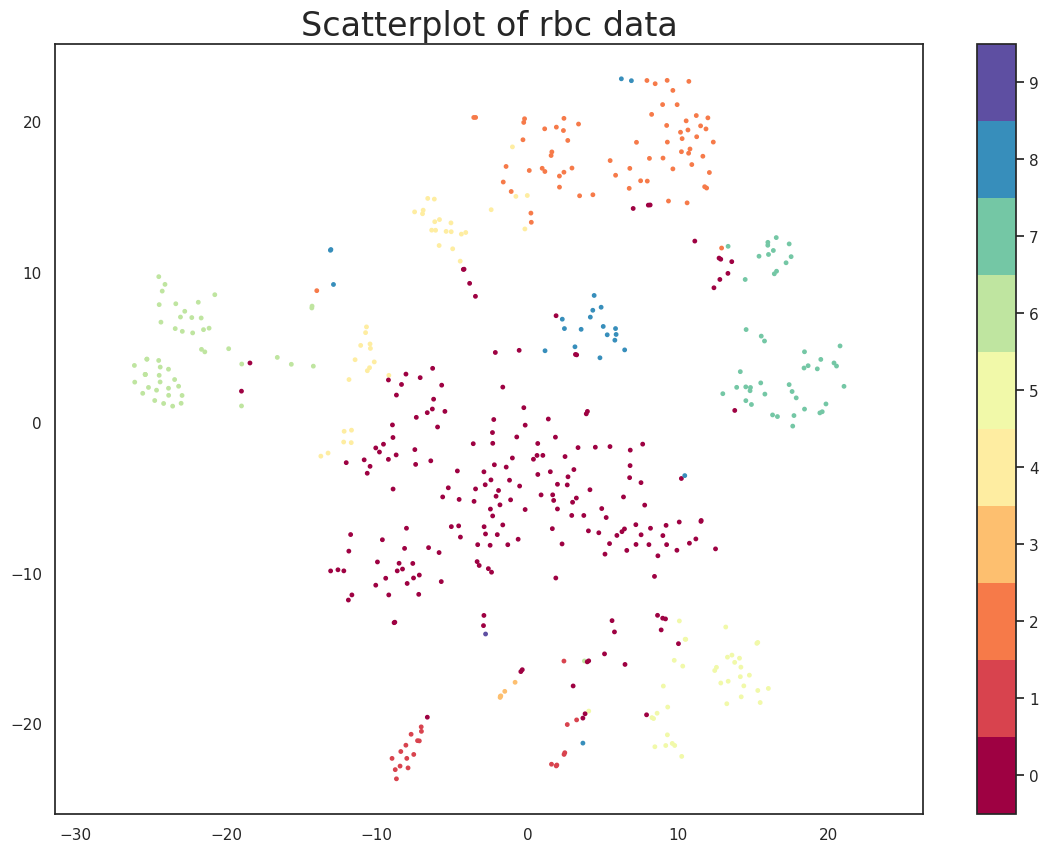

In [32]:
plt.scatter(tsne[:, 0], tsne[:, 1],  c=y_kmeans.labels_, s=6, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Scatterplot of rbc data', fontsize=24)